# Enterprise Data Science Bootcamp Project
### Enterprise Data Science & Analytics 2025

---

### Team Members:
- **Daniel Almeida** (20241154)
- **Gonçalo Dias** (20240819)
- **Miguel Almeida** (20241151)

In [212]:
%run ../utils/configuration.ipynb

In [213]:
import sys
import polars as pl

In [214]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [215]:
try:
    df = pl.read_parquet(train_path)
except Exception as e:
    print(f"Error: {e}")
    sys.exit(1)


<a class="anchor" id="1st-bullet">
# 1. Data Collection and Initial Processing & Exploratory Data Analysis
</a>

In [216]:
df.shape

(5634, 50)

In [217]:
#df.index

In [218]:
df.filter(df.is_duplicated())

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64,str,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,i64,str,str,i64,i64,i64,str,str,i64


In [219]:
df.columns

['customer_id',
 'referred_a_friend',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'city',
 'zip_code',
 'lat_long',
 'latitude',
 'longitude',
 'count',
 'quarter',
 'satisfaction_score',
 'customer_status',
 'churn_label',
 'churn_value',
 'churn_score',
 'cltv',
 'churn_category',
 'churn_reason',
 'population']

In [220]:
df.describe()

statistic,customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,str,str,f64,f64,str,str,f64,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,str,f64,str,f64,f64,f64,str,f64,str,str,f64,f64,f64,str,str,f64
"""count""","""5634""","""5634""",5634.0,5634.0,"""5634""","""5634""",5634.0,"""5634""","""5634""","""5634""",5634.0,"""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""",5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,"""5634""",5634.0,0.0,5634.0,5634.0,5634.0,"""5634""",5634.0,"""5634""",5634.0,5634.0,5634.0,"""5634""",5634.0,"""5634""","""5634""",5634.0,5634.0,5634.0,"""5634""","""5634""",5634.0
"""null_count""","""0""","""0""",0.0,0.0,"""0""","""0""",0.0,"""0""","""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,5634.0,0.0,0.0,0.0,"""0""",0.0,"""0""",0.0,0.0,0.0,"""0""",0.0,"""0""","""0""",0.0,0.0,0.0,"""0""","""0""",0.0
"""mean""",null,null,1.942847,32.257898,null,null,22.892244,null,null,null,20.314696,null,null,null,null,null,null,null,null,null,null,null,64.726997,2274.753133,1.911683,6.925808,746.561113,3026.328371,null,46.535144,null,0.162407,0.482783,0.467341,null,93487.589102,null,36.194699,-119.751238,1.0,null,3.239794,null,null,0.267306,58.582002,4394.774228,null,null,21937.330671
"""std""",null,null,2.984593,24.516066,null,null,15.486741,null,null,null,20.28378,null,null,null,null,null,null,null,null,null,null,null,30.087704,2267.404931,7.825644,25.261125,848.876616,2872.078919,null,16.754159,null,0.368856,0.499748,0.960288,null,1848.129736,null,2.470986,2.161052,0.0,null,1.199964,null,null,0.442592,21.165761,1185.883438,null,null,20845.889733
"""min""","""0002-ORFBO""","""No""",0.0,1.0,"""None""","""No""",0.0,"""No""","""No""","""Cable""",0.0,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-Month""","""No""","""Bank Withdrawal""",18.25,18.8,0.0,0.0,0.0,21.36,"""Female""",19.0,null,0.0,0.0,0.0,"""Acampo""",90001.0,"""32.555828, -117.040073""",32.555828,-124.301372,1.0,"""Q3""",1.0,"""Churned""","""No""",0.0,7.0,2003.0,"""Attitude""","""Attitude of service provider""",11.0
"""25%""",null,null,0.0,9.0,null,null,9.08,null,null,null,3.0,null,null,null,null,null,null,null,null,null,null,null,35.4,392.65,0.0,0.0,69.14,600.0,null,33.0,null,0.0,0.0,0.0,null,92105.0,null,33.988543,-121.805845,1.0,null,3.0,null,null,0.0,41.0,3455.0,null,null,2349.0
"""50%""",null,null,0.0,29.0,null,null,22.75,null,null,null,17.0,null,null,null,null,null,null,null,null,null,null,null,70.4,1390.6,0.0,0.0,393.5,2090.98,null,46.0,null,0.0,0.0,0.0,null,93516.0,null,36.205465,-119.57013,1.0,null,3.0,null,null,0.0,62.0,4512.0,null,null,17269.0
"""75%""",null,null,3.0,55.0,null,null,36.36,null,null,null,27.0,null,null,null,null,null,null,null,null,null,null,null,89.8,3770.0,0.0,0.0,1187.24,4760.36,null,60.0,null,0.0,1.0,0.0,null,95325.0,null,38.161321,-117.969501,1.0,null,4.0,null,null,1.0,76.0,5378.0,null,null,35808.0
"""max""","""9995-HOTOH""","""Yes""",11.0,72.0,"""Offer E""","""Yes""",49.99,"""Yes""","""Yes""","""None""",85.0,"""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Two Year""","""Yes""","""Mailed Check""",

In [221]:
df.schema

Schema([('customer_id', String),
        ('referred_a_friend', String),
        ('number_of_referrals', Int64),
        ('tenure_in_months', Int64),
        ('offer', String),
        ('phone_service', String),
        ('avg_monthly_long_distance_charges', Float64),
        ('multiple_lines', String),
        ('internet_service', String),
        ('internet_type', String),
        ('avg_monthly_gb_download', Int64),
        ('online_security', String),
        ('online_backup', String),
        ('device_protection_plan', String),
        ('premium_tech_support', String),
        ('streaming_tv', String),
        ('streaming_movies', String),
        ('streaming_music', String),
        ('unlimited_data', String),
        ('contract', String),
        ('paperless_billing', String),
        ('payment_method', String),
        ('monthly_charge', Float64),
        ('total_charges', Float64),
        ('total_refunds', Float64),
        ('total_extra_data_charges', Int64),
        ('total_lo

In [222]:
df.null_count()

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5634,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [223]:
df.select(pl.all().n_unique())

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
5634,2,12,72,6,2,3176,2,2,4,50,2,2,2,2,2,2,2,2,3,2,3,1495,5292,395,16,4908,5599,2,62,1,2,2,9,1104,1623,1668,1623,1622,1,1,5,3,2,2,80,3122,6,21,1566


In [224]:
for col in df.columns:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: customer_id
shape: (5_634, 1)
┌─────────────┐
│ customer_id │
│ ---         │
│ str         │
╞═════════════╡
│ 4518-FZBSX  │
│ 4075-JFPGR  │
│ 6360-SVNWV  │
│ 7567-ECMCM  │
│ 7375-WMVMT  │
│ …           │
│ 4057-FKCZK  │
│ 0461-CVKMU  │
│ 9631-XEYKE  │
│ 7636-OWBPG  │
│ 8690-UPCZI  │
└─────────────┘

Coluna: referred_a_friend
shape: (2, 1)
┌───────────────────┐
│ referred_a_friend │
│ ---               │
│ str               │
╞═══════════════════╡
│ Yes               │
│ No                │
└───────────────────┘

Coluna: number_of_referrals
shape: (12, 1)
┌─────────────────────┐
│ number_of_referrals │
│ ---                 │
│ i64                 │
╞═════════════════════╡
│ 0                   │
│ 3                   │
│ 9                   │
│ 6                   │
│ 4                   │
│ …                   │
│ 1                   │
│ 5                   │
│ 8                   │
│ 2                   │
│ 11                  │
└─────────────────────┘

Coluna: tenure_in_mo

In [225]:
df.select(pl.col(pl.NUMERIC_DTYPES)).describe()

C:\Users\Danie\AppData\Local\Temp\ipykernel_24940\3086008548.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  df.select(pl.col(pl.NUMERIC_DTYPES)).describe()


statistic,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,age,under_30,senior_citizen,married,number_of_dependents,zip_code,latitude,longitude,count,satisfaction_score,churn_value,churn_score,cltv,population
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,0.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5634.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.942847,32.257898,22.892244,20.314696,64.726997,2274.753133,1.911683,6.925808,746.561113,3026.328371,46.535144,null,0.162407,0.482783,0.467341,93487.589102,36.194699,-119.751238,1.0,3.239794,0.267306,58.582002,4394.774228,21937.330671
"""std""",2.984593,24.516066,15.486741,20.28378,30.087704,2267.404931,7.825644,25.261125,848.876616,2872.078919,16.754159,null,0.368856,0.499748,0.960288,1848.129736,2.470986,2.161052,0.0,1.199964,0.442592,21.165761,1185.883438,20845.889733
"""min""",0.0,1.0,0.0,0.0,18.25,18.8,0.0,0.0,0.0,21.36,19.0,null,0.0,0.0,0.0,90001.0,32.555828,-124.301372,1.0,1.0,0.0,7.0,2003.0,11.0
"""25%""",0.0,9.0,9.08,3.0,35.4,392.65,0.0,0.0,69.14,600.0,33.0,null,0.0,0.0,0.0,92105.0,33.988543,-121.805845,1.0,3.0,0.0,41.0,3455.0,2349.0
"""50%""",0.0,29.0,22.75,17.0,70.4,1390.6,0.0,0.0,393.5,2090.98,46.0,null,0.0,0.0,0.0,93516.0,36.205465,-119.57013,1.0,3.0,0.0,62.0,4512.0,17269.0
"""75%""",3.0,55.0,36.36,27.0,89.8,3770.0,0.0,0.0,1187.24,4760.36,60.0,null,0.0,1.0,0.0,95325.0,38.161321,-117.969501,1.0,4.0,1.0,76.0,5378.0,35808.0
"""max""",11.0,72.0,49.99,85.0,118.75,8684.8,49.79,150.0,3564.72,11979.34,80.0,null,1.0,1.0,8.0,96150.0,41.962127,-114.192901,1.0,5.0,1.0,96.0,6499.0,105285.0


In [226]:
df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))

C:\Users\Danie\AppData\Local\Temp\ipykernel_24940\4039034894.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))


In [227]:
df_numerical_variables.columns

['number_of_referrals',
 'tenure_in_months',
 'avg_monthly_long_distance_charges',
 'avg_monthly_gb_download',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'zip_code',
 'latitude',
 'longitude',
 'count',
 'satisfaction_score',
 'churn_value',
 'churn_score',
 'cltv',
 'population']

In [228]:
df_numerical_variables = df_numerical_variables.drop(['under_30'])


In [229]:
df_numerical_variables

number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,age,senior_citizen,married,number_of_dependents,zip_code,latitude,longitude,count,satisfaction_score,churn_value,churn_score,cltv,population
i64,i64,f64,i64,f64,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64
5,20,36.6,51,82.4,1592.35,33.43,0,732.0,2290.92,26,0,1,1,91001,34.196837,-118.142236,1,1,1,86,5719,36243
0,6,0.0,52,29.45,161.45,0.0,0,0.0,161.45,22,0,0,0,93620,37.045728,-120.630682,1,3,0,42,4391,9388
0,30,7.19,18,90.4,2820.65,0.0,0,215.7,3036.35,62,0,0,0,95372,37.990574,-120.261821,1,4,0,78,3171,1519
0,3,1.47,0,20.25,71.2,0.0,0,4.41,75.61,60,0,0,0,96008,40.722733,-122.109666,1,3,0,31,4331,899
2,35,4.16,28,81.6,2815.25,0.0,0,145.6,2960.85,76,1,1,0,94037,37.540582,-122.509594,1,3,0,60,2300,2346
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,67,16.72,0,25.6,1790.35,46.06,0,1120.24,2864.53,53,0,0,0,91204,34.136306,-118.26036,1,3,0,34,5183,17015
0,2,33.89,41,80.55,184.1,0.0,0,67.78,251.88,29,0,0,0,92543,33.739415,-116.968339,1,3,1,69,2856,29687
6,72,46.16,14,110.9,8240.85,0.0,0,3323.52,11564.37,37,0,1,0,92358,34.238162,-117.534306,1,3,0,67,4938,1090


C:\Users\Danie\AppData\Local\Temp\ipykernel_24940\1736945150.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1) = plt.subplots(1,1, figsize = (14,6))


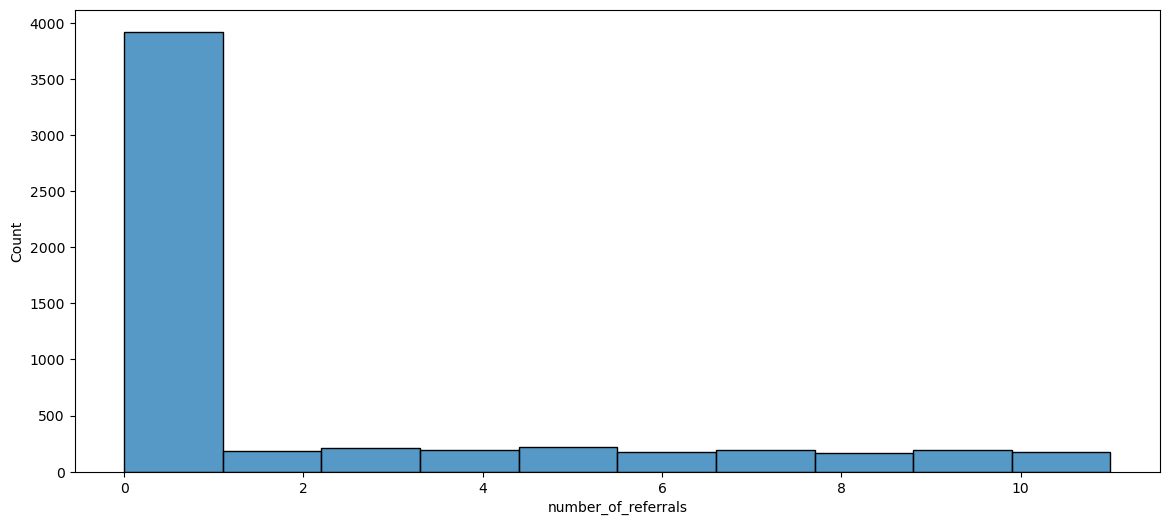

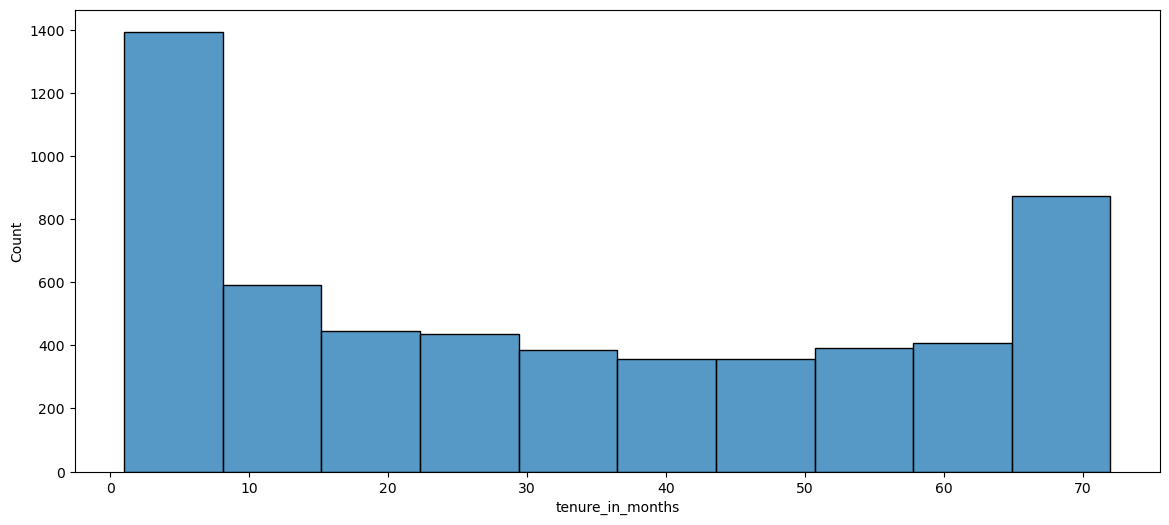

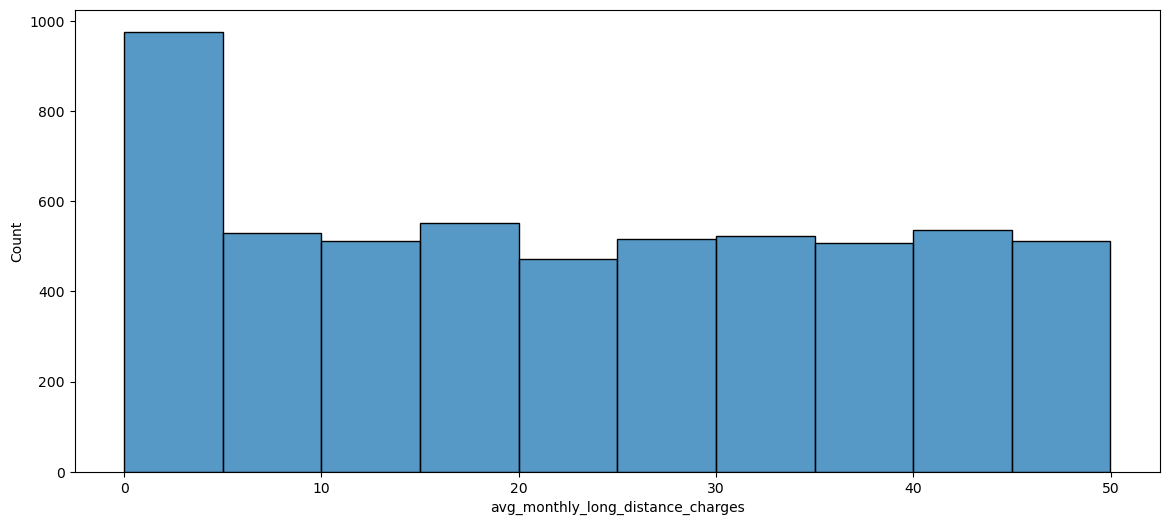

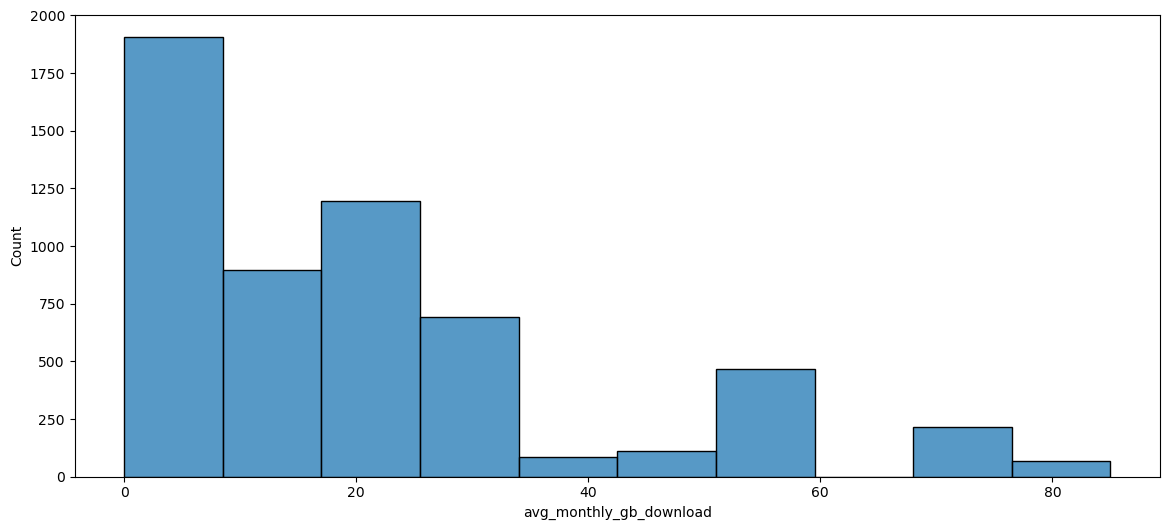

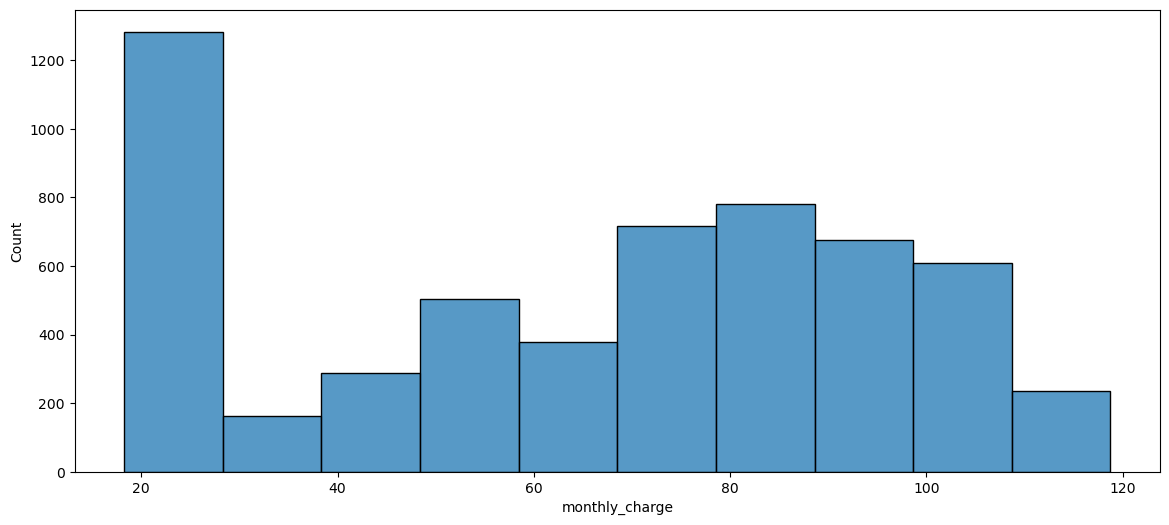

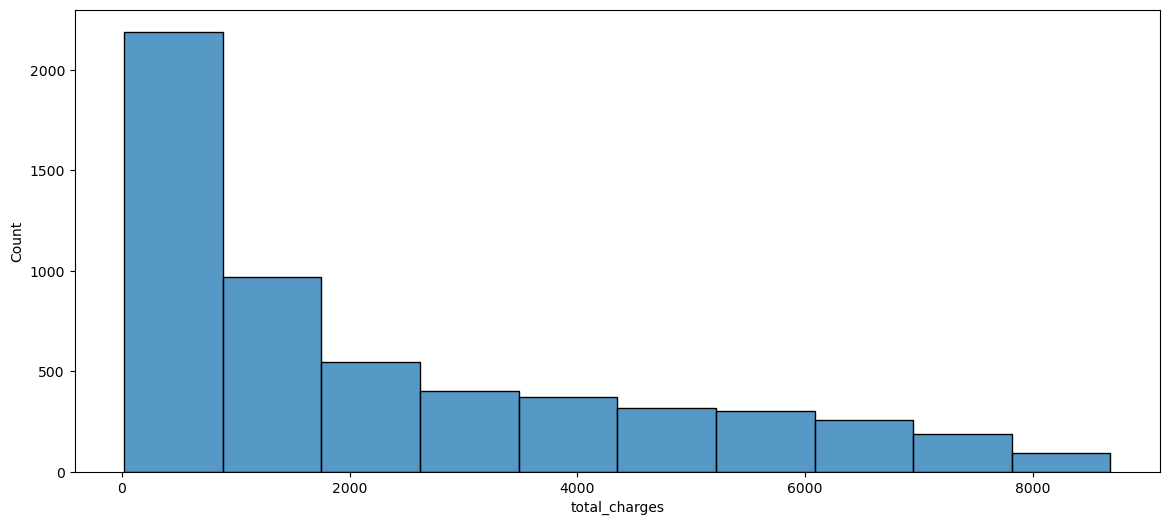

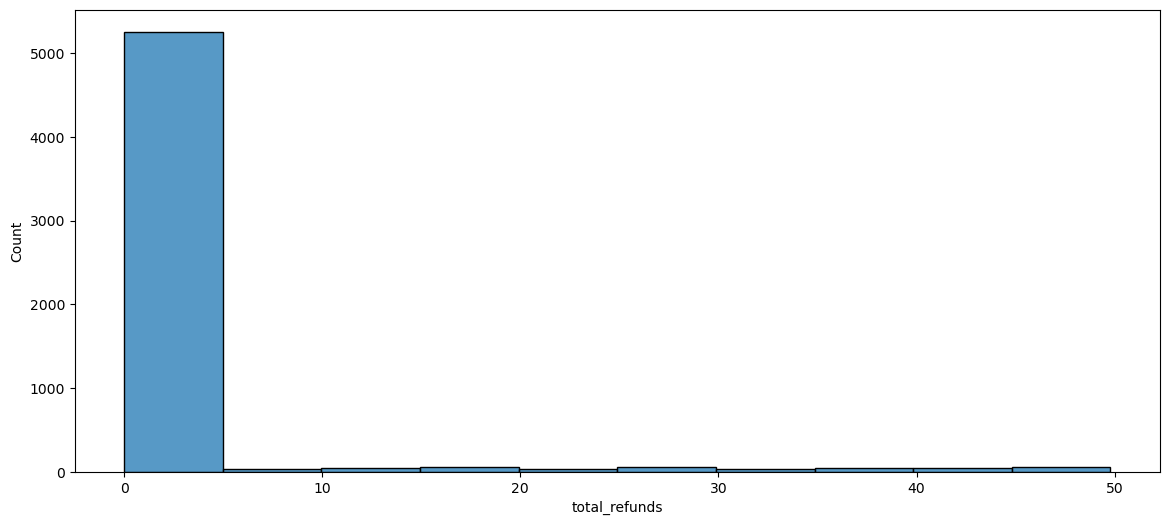

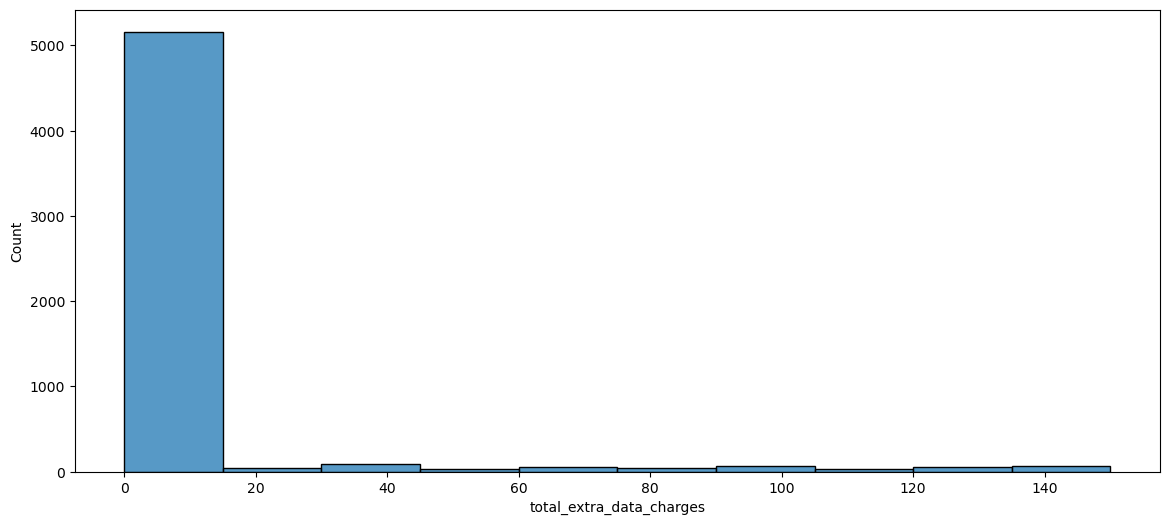

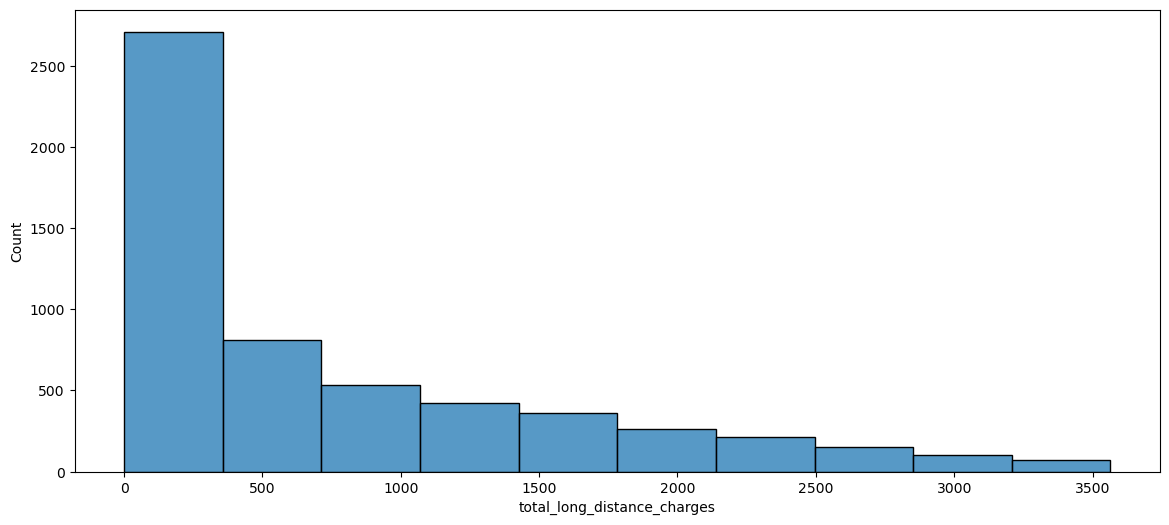

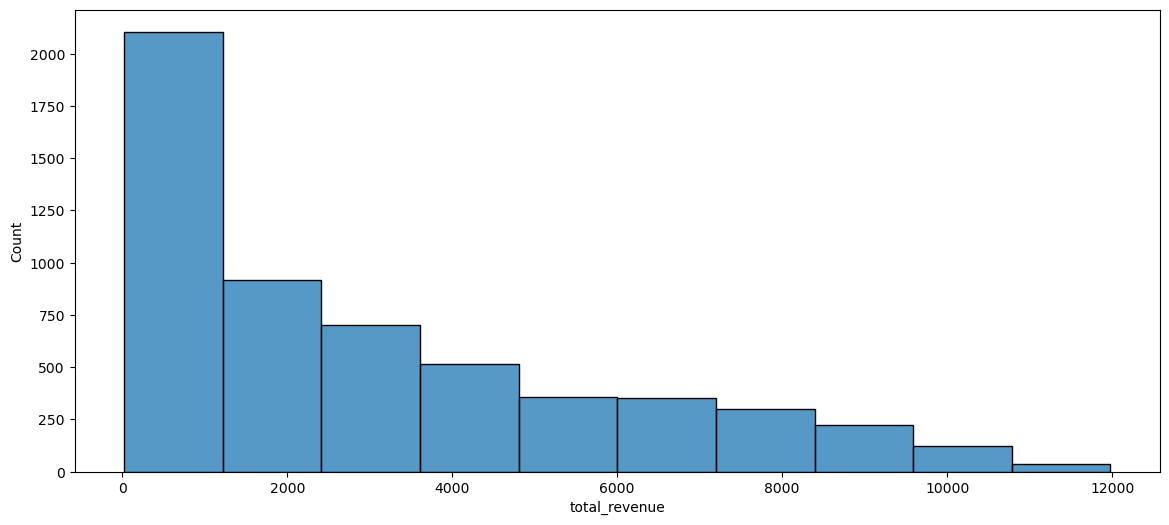

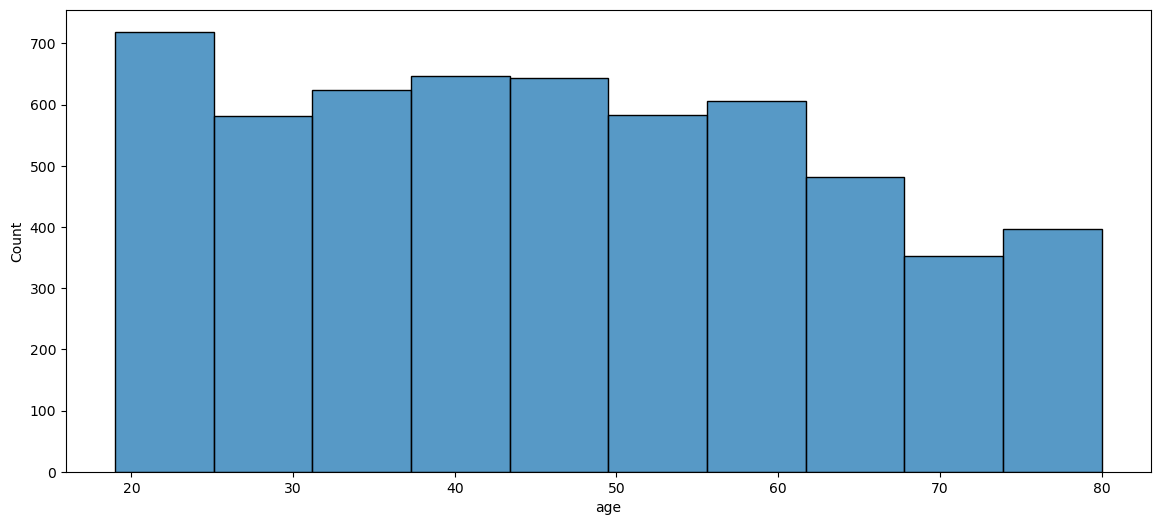

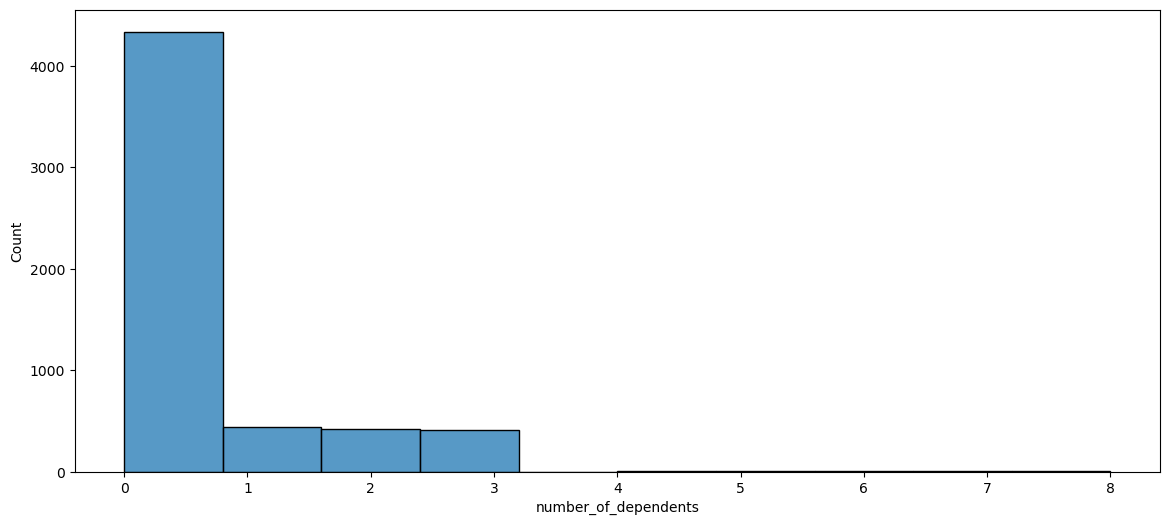

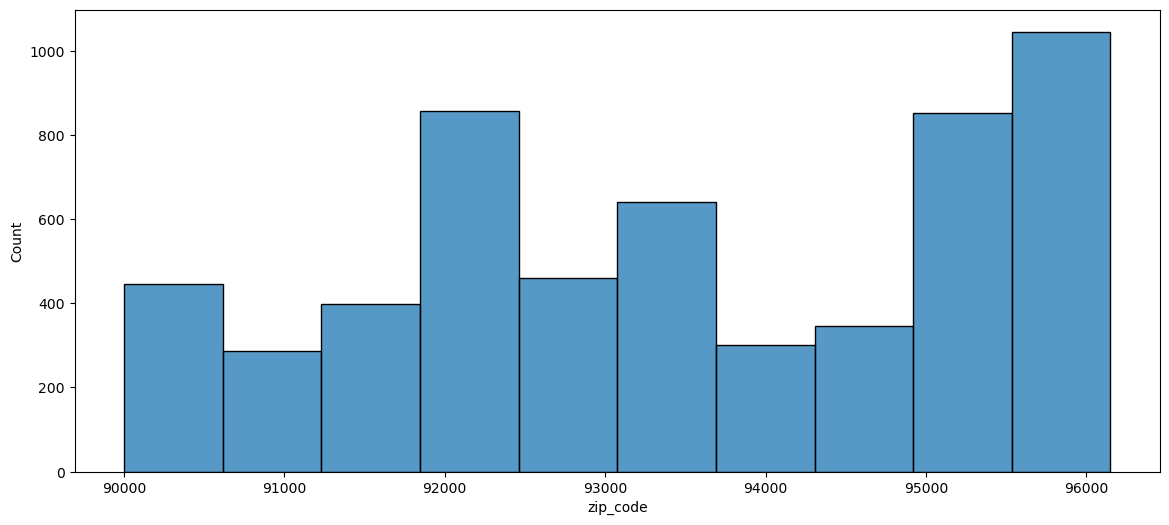

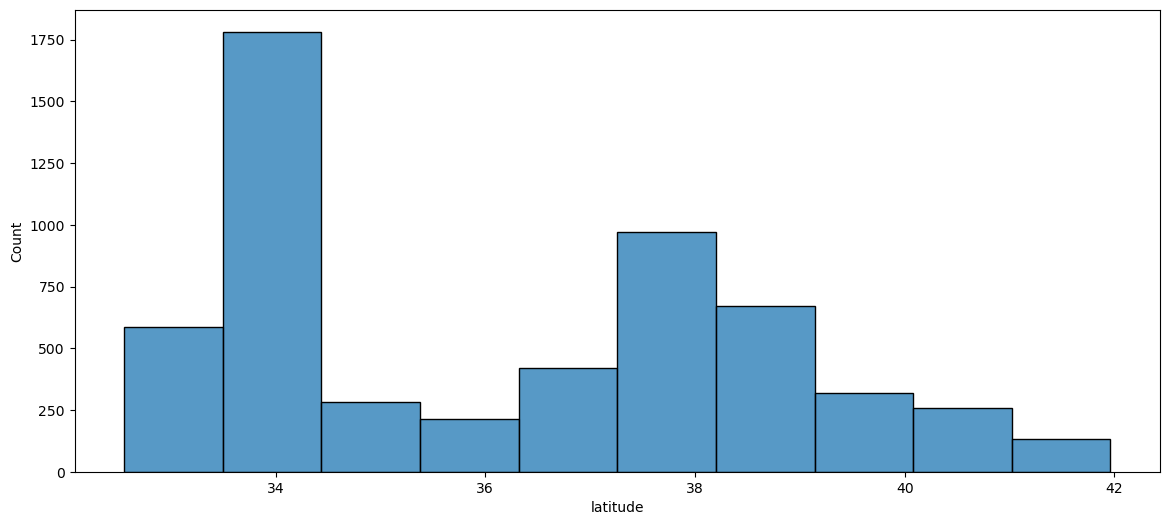

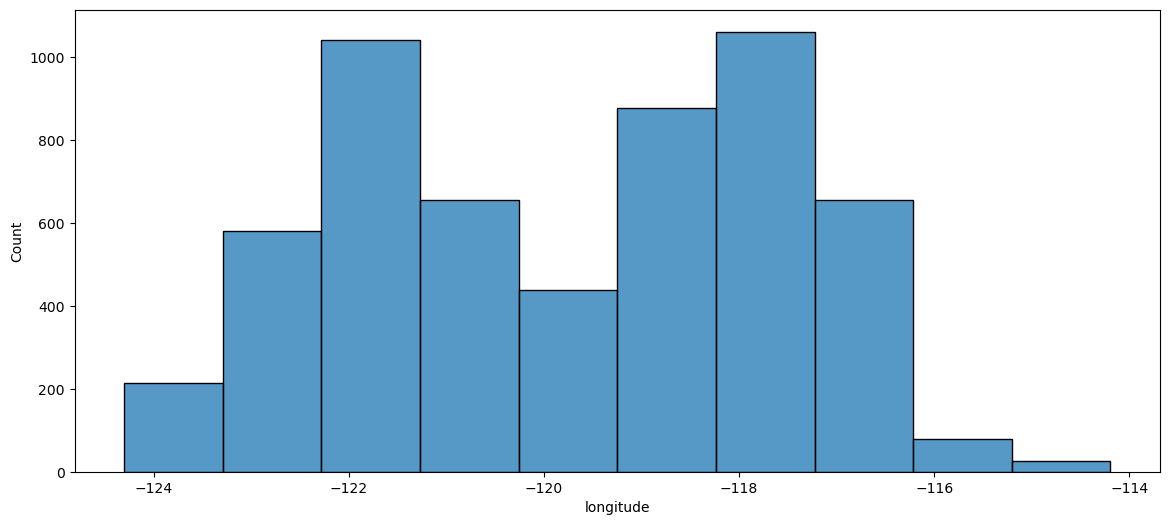

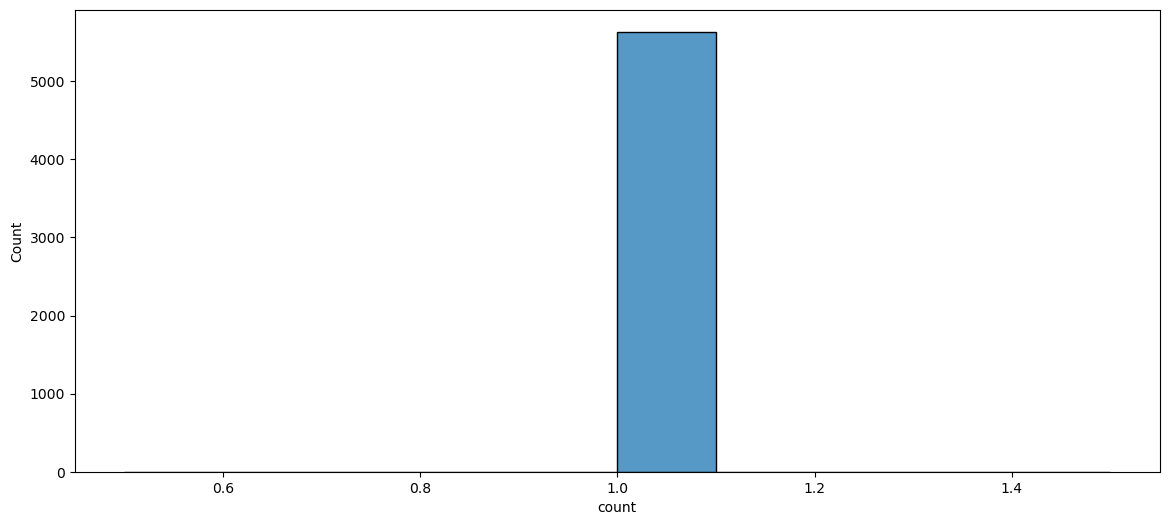

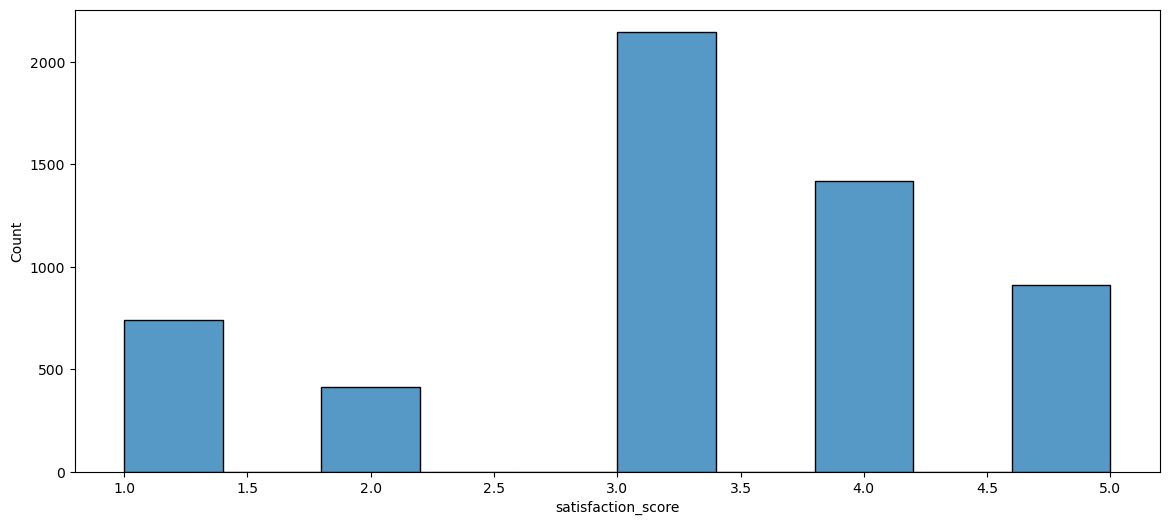

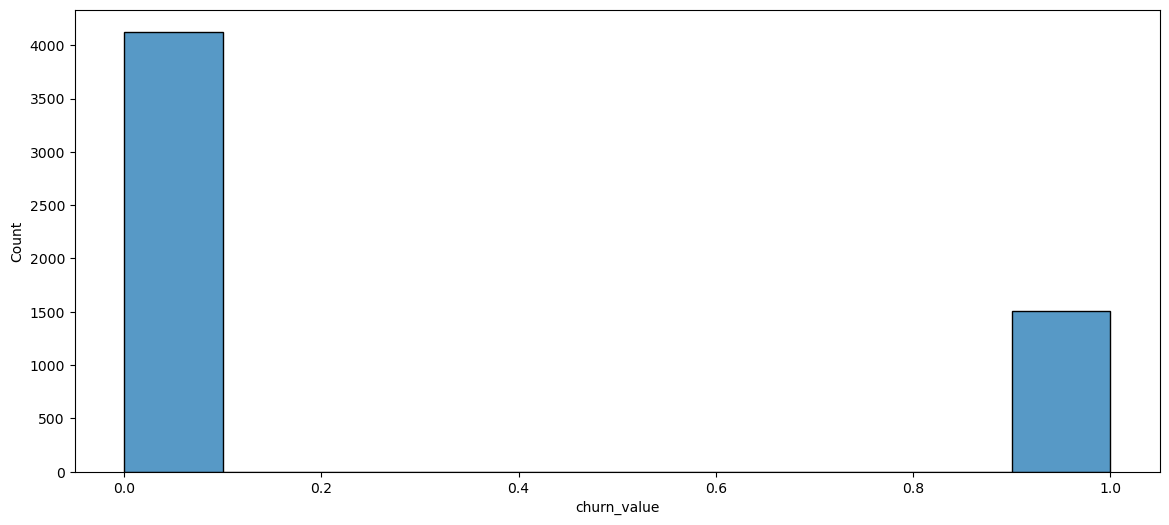

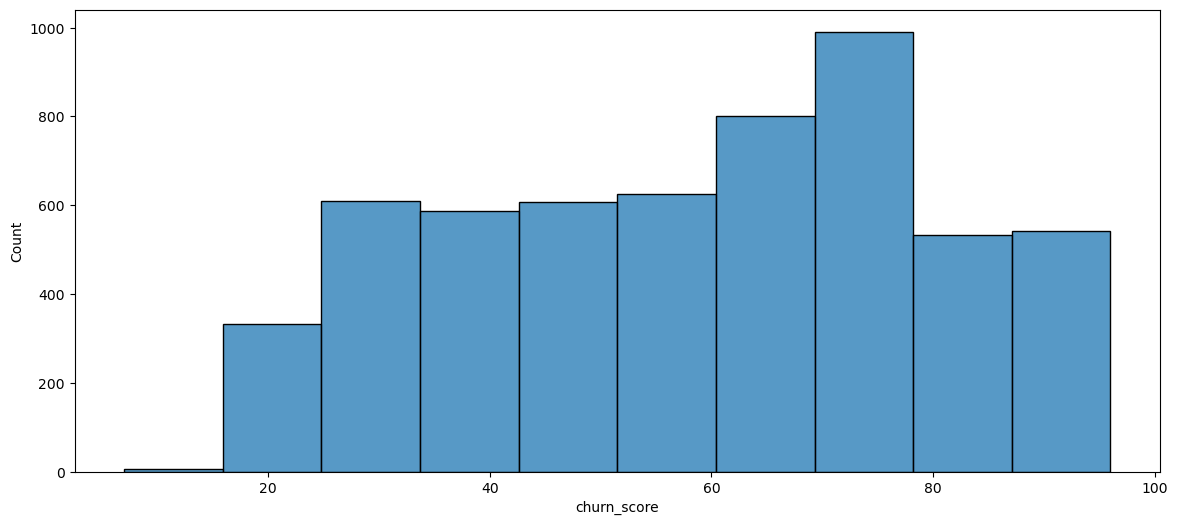

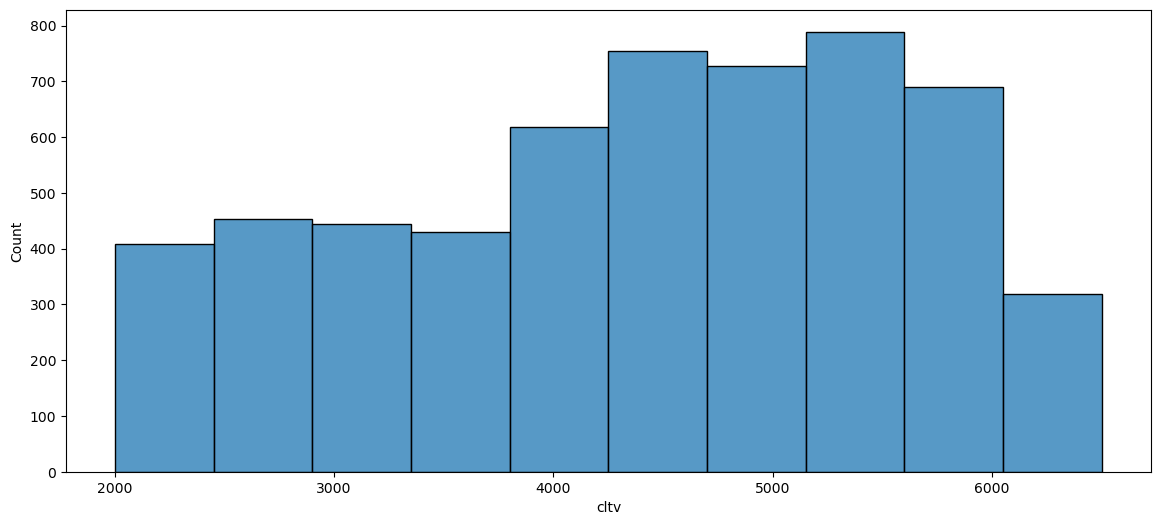

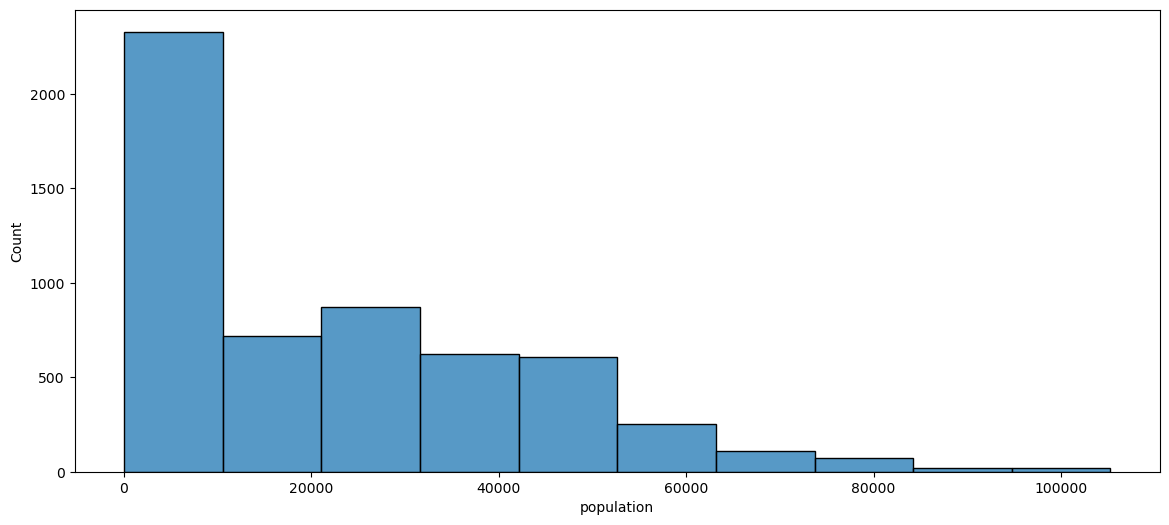

In [230]:
bivalue_columns_x = [
    'referred_a_friend'
    ,'phone_service'
    ,'multiple_lines'
    ,'internet_service'
    ,'online_security'
    ,'online_backup'
    ,'device_protection_plan'
    ,'premium_tech_support'
    ,'streaming_tv'
    ,'streaming_movies'
    ,'streaming_music'
    ,'unlimited_data'
    ,'paperless_billing'
    ,'gender'
    ,'churn_label'
    ,'senior_citizen'
    ,'married'
]
for col in df_numerical_variables.columns:
    if col in bivalue_columns_x:
        continue
    fig, (ax1) = plt.subplots(1,1, figsize = (14,6)) 
    sns.histplot(ax = ax1, data = df_numerical_variables.to_pandas(), x = col, bins = 10) #df_numerical_variables.to_pandas



In [231]:
#"population","citv",
#df['Healthcare_Costs'] = np.log(df['Healthcare Costs'])
#df['Incidence_Rate_per_100K'] = np.log(df['Incidence Rate per 100K'])
#df['Mortality_Rate_per_100K'] = np.log(df['Mortality Rate per 100K'])
#df['Tumor_Size_(mm)'] = np.cbrt(df['Tumor Size (mm)'])

Correlation between Numerical Variables

<Axes: >

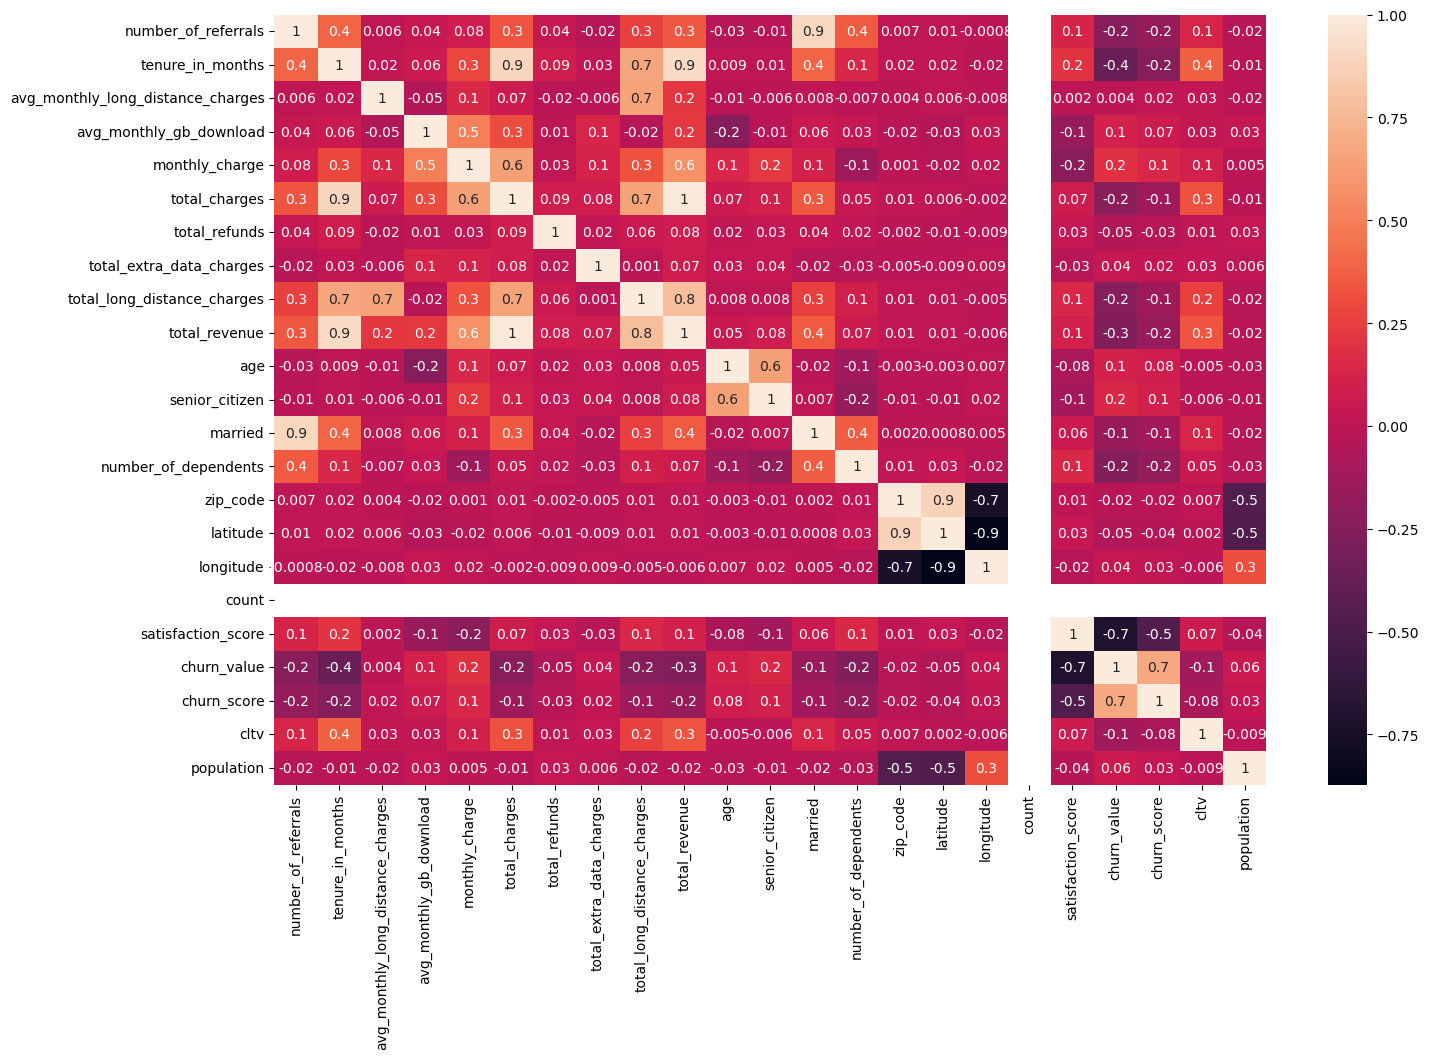

In [232]:
# calculate correlation matrix (convert to pandas for spearman correlation)
from scipy.stats import spearmanr
df_corr = df_numerical_variables.to_pandas().corr(method='spearman')

# plot the correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

In [233]:
df_corr

,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,...,number_of_dependents,zip_code,latitude,longitude,count,satisfaction_score,churn_value,churn_score,cltv,population
number_of_referrals,1.000000,0.385776,0.006105,0.044539,0.079012,0.331139,0.036951,-0.024850,0.254967,0.342013,...,0.351567,0.007072,0.010366,-0.000820,NaN,0.127943,-0.233087,-0.174388,0.131511,-0.018508
tenure_in_months,0.385776,1.000000,0.020869,0.063056,0.279419,0.891295,0.088704,0.026734,0.665971,0.914044,...,0.138736,0.015812,0.019991,-0.016297,NaN,0.200804,-0.362582,-0.237232,0.372791,-0.014391
avg_monthly_long_distance_charges,0.006105,0.020869,1.000000,-0.051518,0.145199,0.065173,-0.015847,-0.006305,0.654544,0.215151,...,-0.006826,0.003781,0.006295,-0.007645,NaN,0.002158,0.003634,0.015383,0.025413,-0.015594
avg_monthly_gb_download,0.044539,0.063056,-0.051518,1.000000,0.495574,0.300915,0.011099,0.135648,-0.020970,0.223544,...,0.028194,-0.015260,-0.034079,0.031429,NaN,-0.148525,0.109401,0.069337,0.025853,0.029300
monthly_charge,0.079012,0.279419,0.145199,0.495574,1.000000,0.638023,0.027331,0.116975,0.320384,0.569704,...,-0.132806,0.000962,-0.018999,0.017740,NaN,-0.216396,0.192396,0.138586,0.106296,0.005234
total_charges,0.331139,0.891295,0.065173,0.300915,0.638023,1.000000,0.086525,0.082455,0.653395,0.978725,...,0.047227,0.012850,0.006478,-0.001841,NaN,0.072542,-0.223364,-0.139139,0.315088,-0.011095
total_refunds,0.036951,0.088704,-0.015847,0.011099,0.027331,0.086525,1.000000,0.015798,0.061218,0.082374,...,0.018573,-0.001677,-0.009660,-0.008827,NaN,0.028459,-0.050611,-0.025397,0.011996,0.028041
total_extra_data_charges,-0.024850,0.026734,-0.006305,0.135648,0.116975,0.082455,0.015798,1.000000,0.001094,0.072337,...,-0.026406,-0.005453,-0.008590,0.008909,NaN,-0.026123,0.036400,0.024480,0.032974,0.005771
total_long_distance_charges,0.254967,0.665971,0.654544,-0.020970,0.320384,0.653395,0.061218,0.001094,1.000000,0.779065,...,0.096988,0.010171,0.009870,-0.004664,NaN,0.141113,-0.238250,-0.140681,0.247164,-0.022534
total_revenue,0.342013,0.914044,0.215151,0.223544,0.569704,0.978725,0.082374,0.072337,0.779065,1.000000,...,0.070171,0.014524,0.010405,-0.005804,NaN,0.106916,-0.256828,-0.159599,0.329243,-0.016282


In [234]:
for col in df_numerical_variables.columns:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: number_of_referrals
shape: (12, 1)
┌─────────────────────┐
│ number_of_referrals │
│ ---                 │
│ i64                 │
╞═════════════════════╡
│ 0                   │
│ 3                   │
│ 9                   │
│ 6                   │
│ 7                   │
│ …                   │
│ 10                  │
│ 5                   │
│ 8                   │
│ 2                   │
│ 11                  │
└─────────────────────┘

Coluna: tenure_in_months
shape: (72, 1)
┌──────────────────┐
│ tenure_in_months │
│ ---              │
│ i64              │
╞══════════════════╡
│ 18               │
│ 15               │
│ 6                │
│ 3                │
│ 9                │
│ …                │
│ 59               │
│ 62               │
│ 65               │
│ 71               │
│ 68               │
└──────────────────┘

Coluna: avg_monthly_long_distance_charges
shape: (3_176, 1)
┌─────────────────────────────────┐
│ avg_monthly_long_distance_char… │
│ ---             

In [235]:
bivalue_columns = [
    'referred_a_friend'
    ,'phone_service'
    ,'multiple_lines'
    ,'internet_service'
    ,'online_security'
    ,'online_backup'
    ,'device_protection_plan'
    ,'premium_tech_support'
    ,'streaming_tv'
    ,'streaming_movies'
    ,'streaming_music'
    ,'unlimited_data'
    ,'paperless_billing'
    ,'gender'
    ,'churn_label'
    #,'senior_citizen'
    #,'married'
]

C:\Users\Danie\AppData\Local\Temp\ipykernel_24940\1510456290.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1) = plt.subplots(1,1, figsize = (14,6))


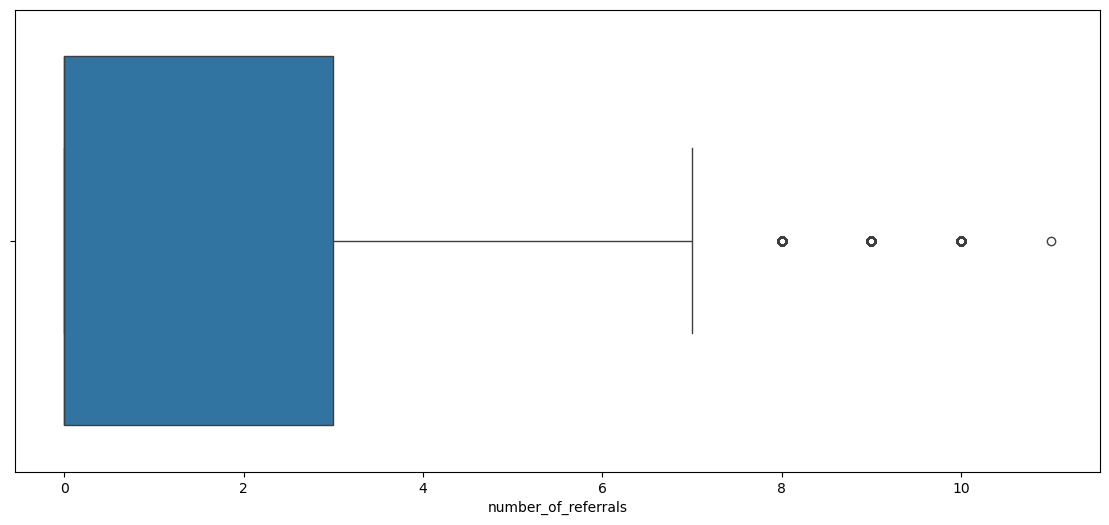

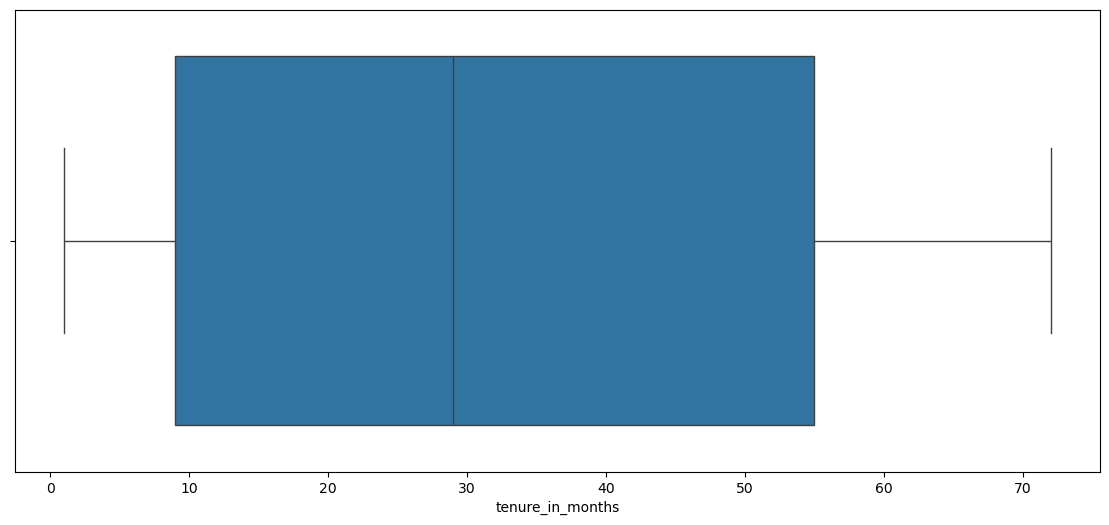

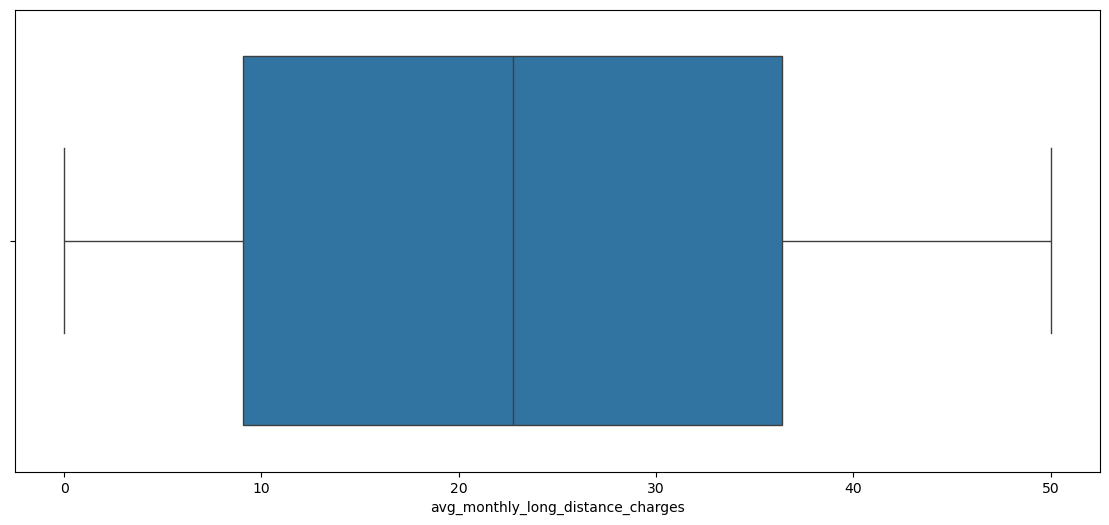

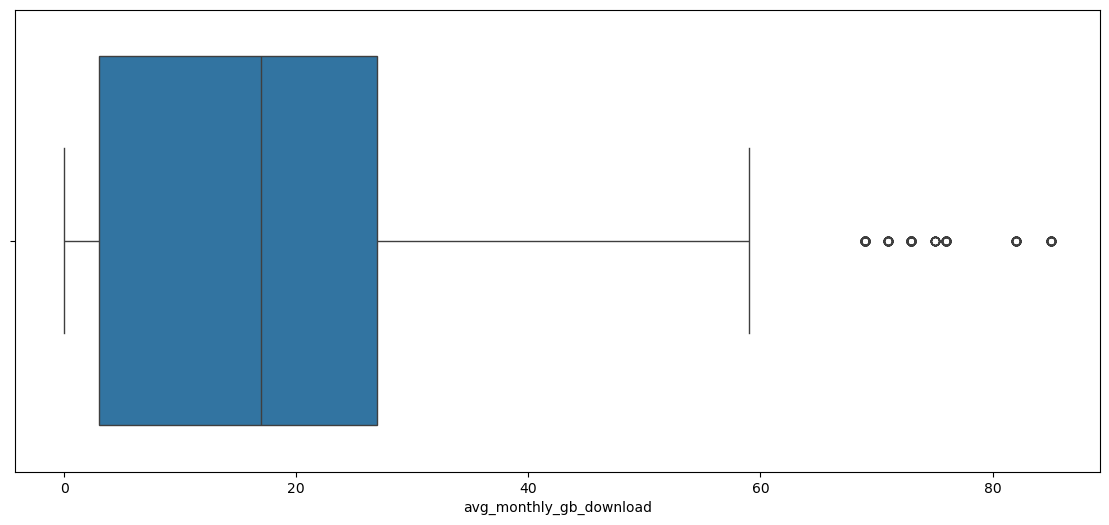

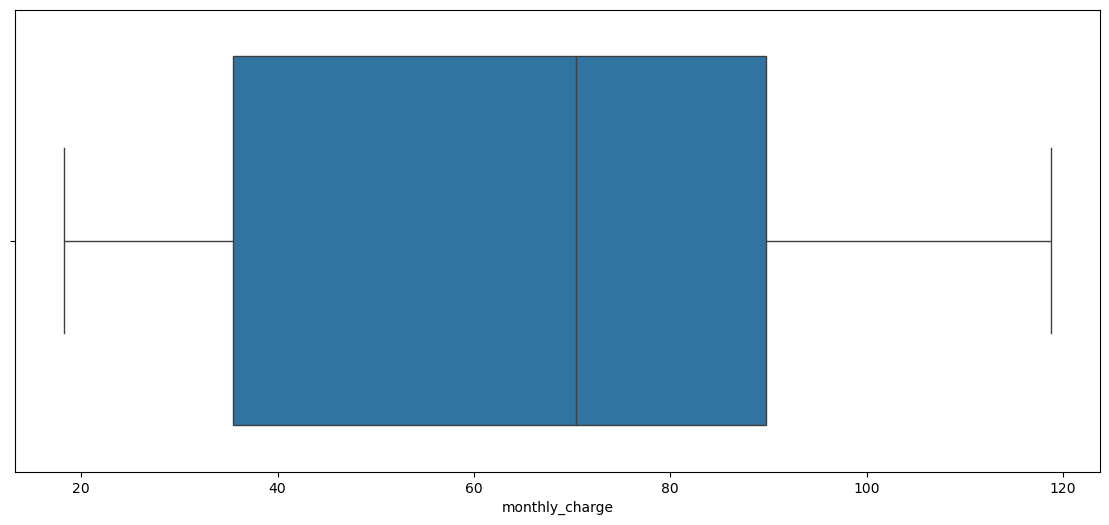

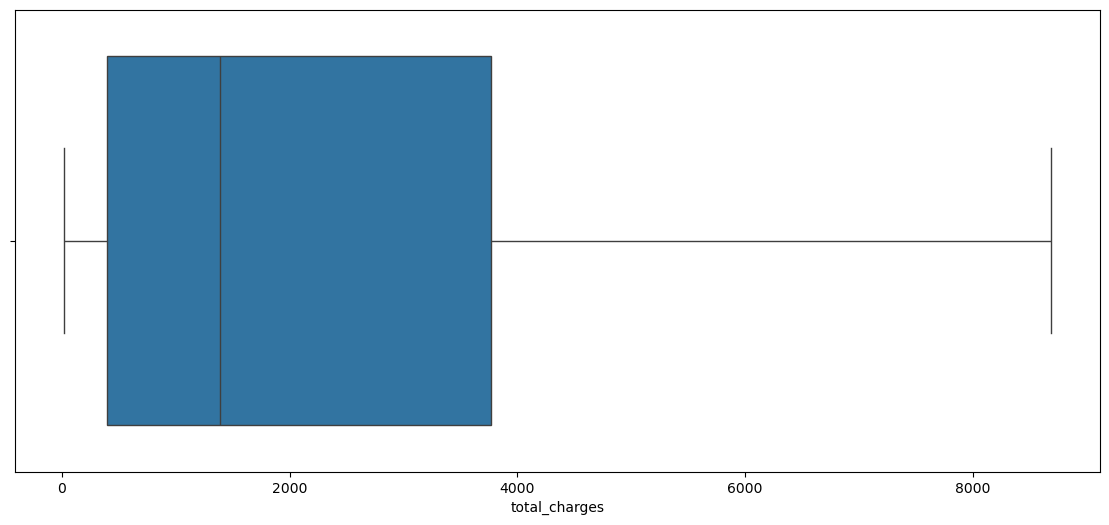

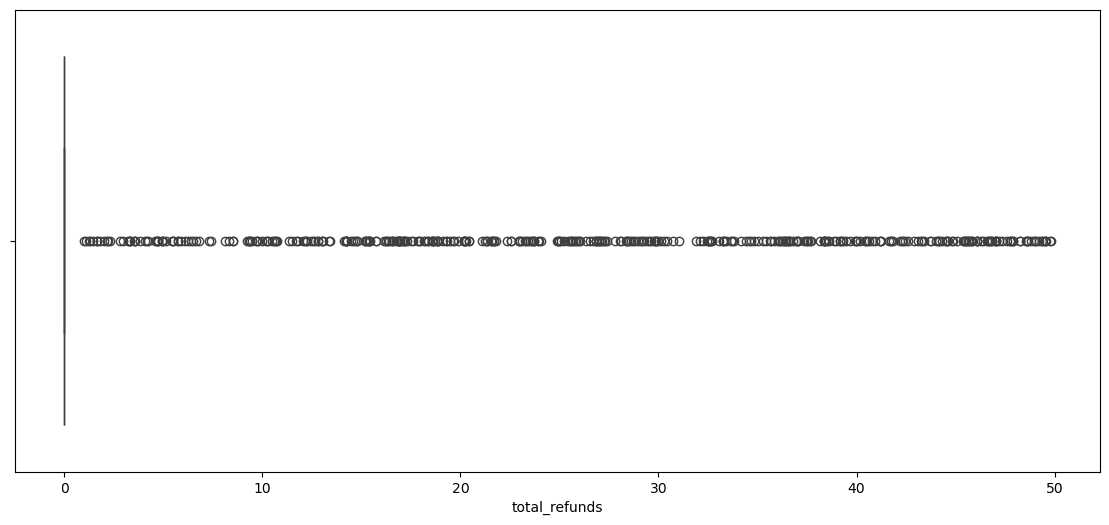

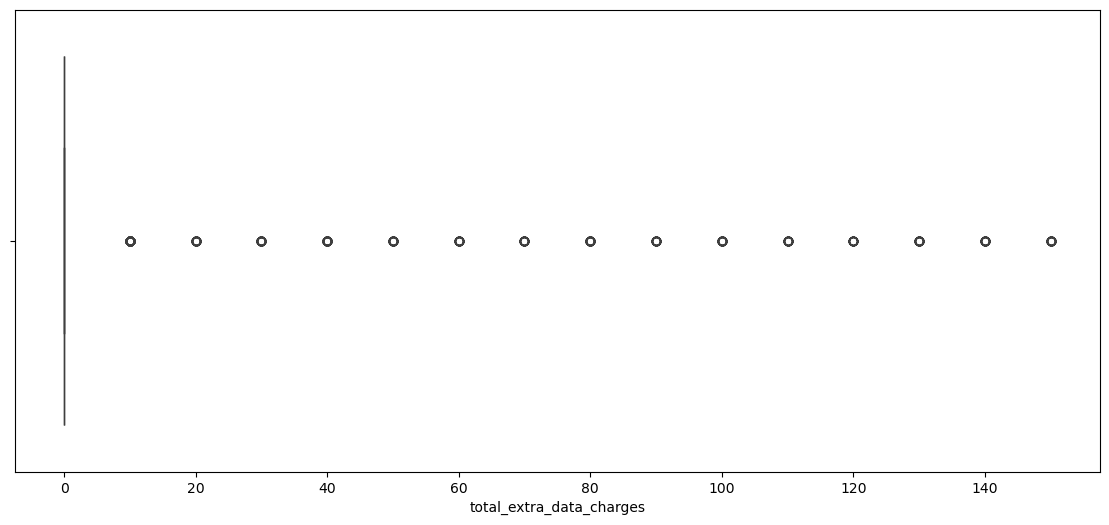

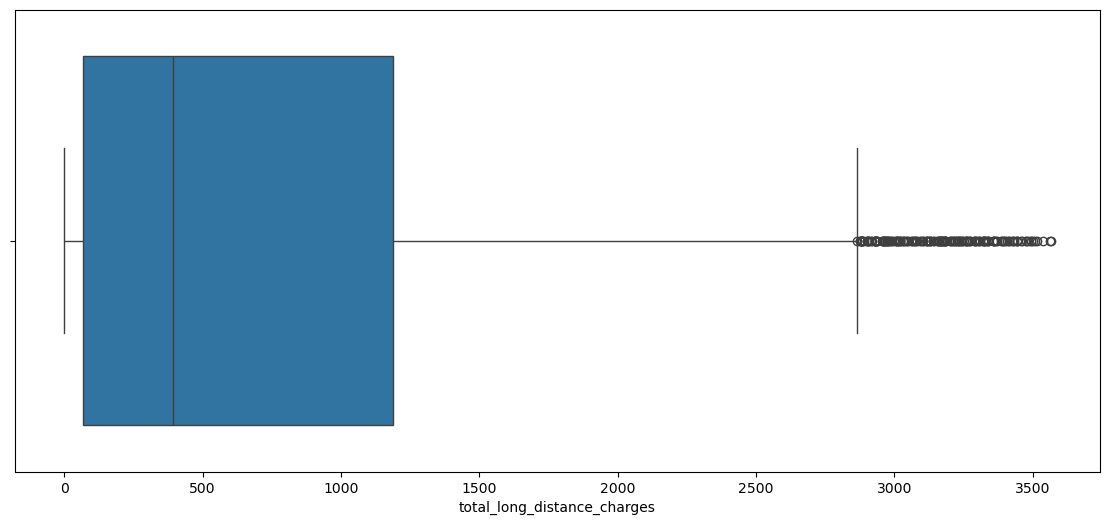

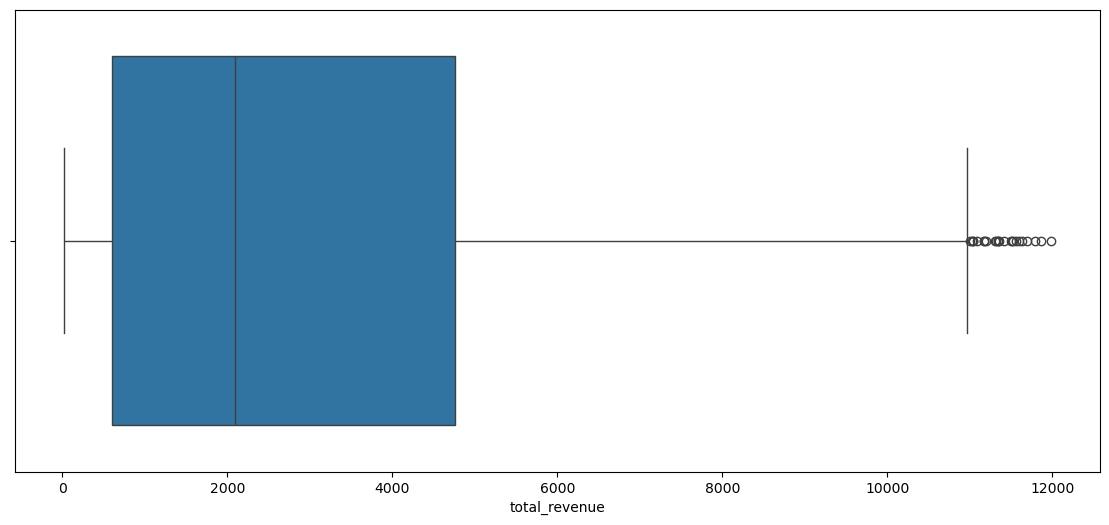

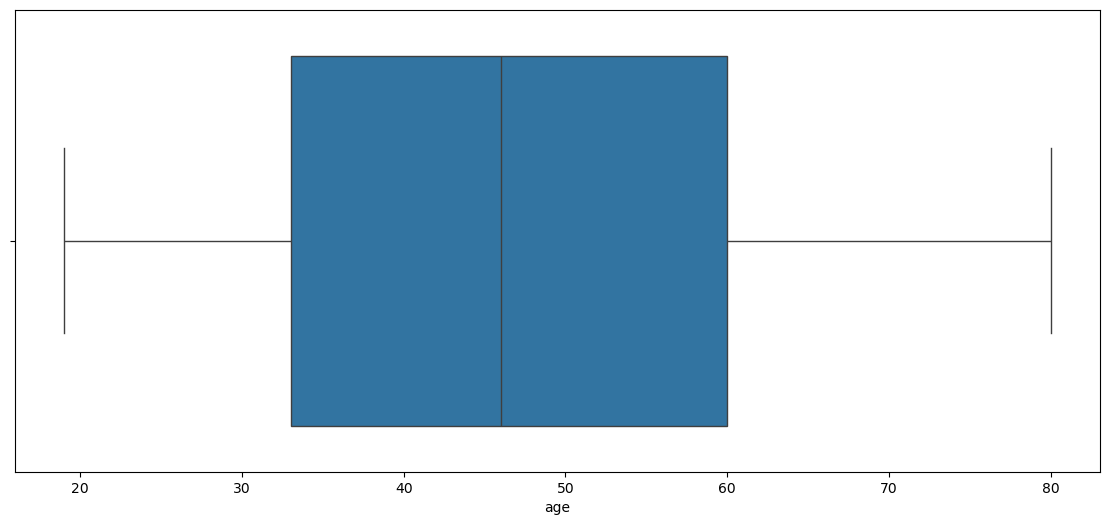

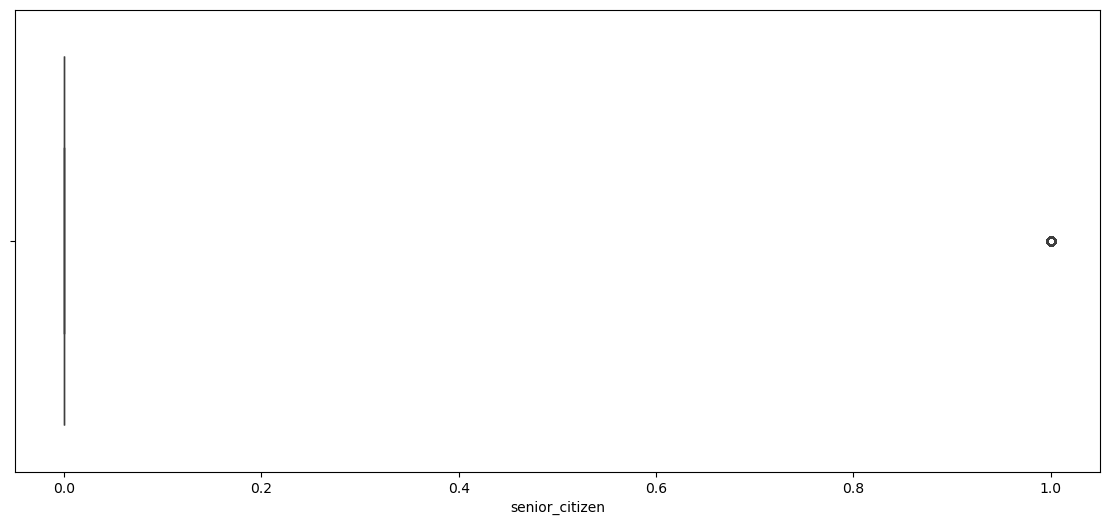

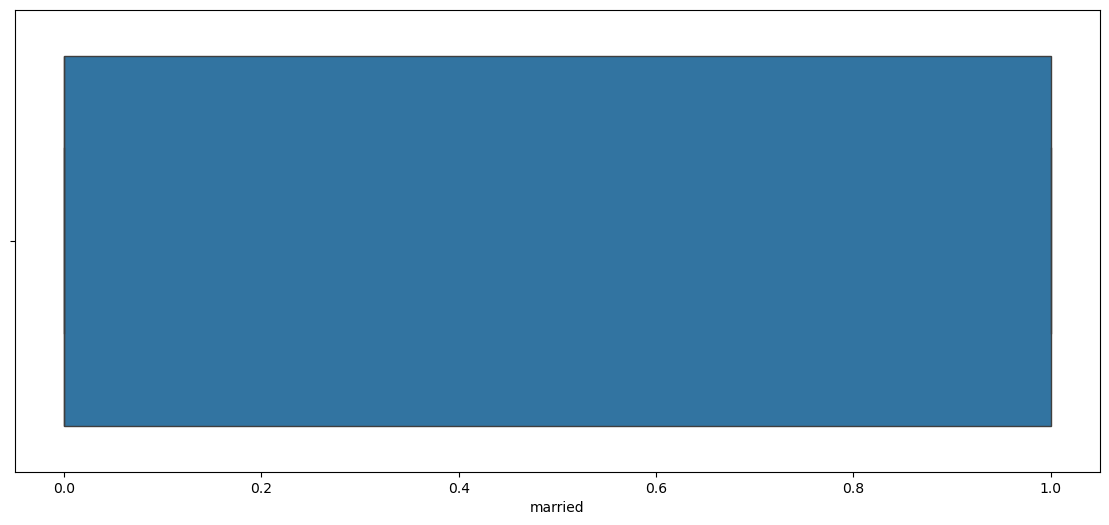

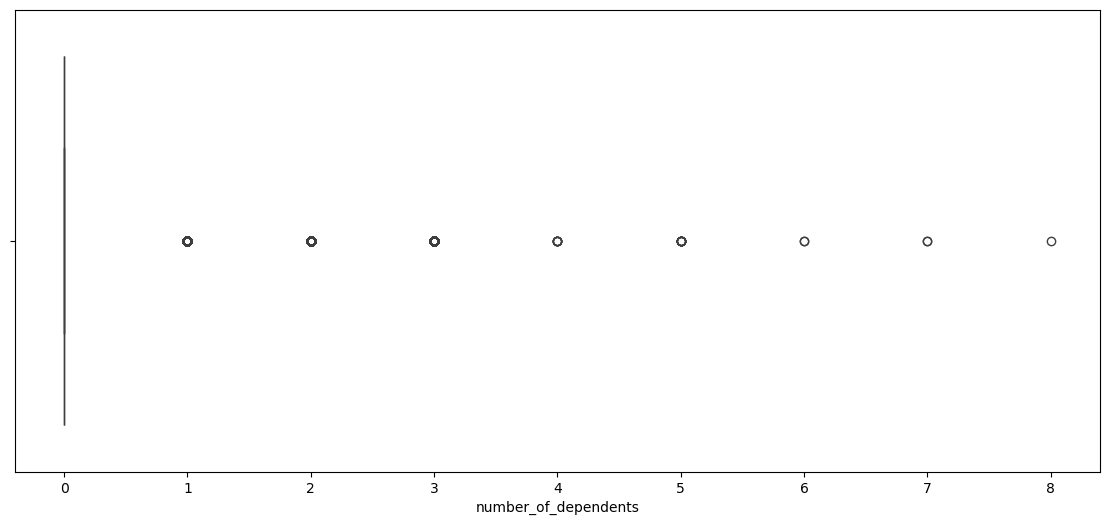

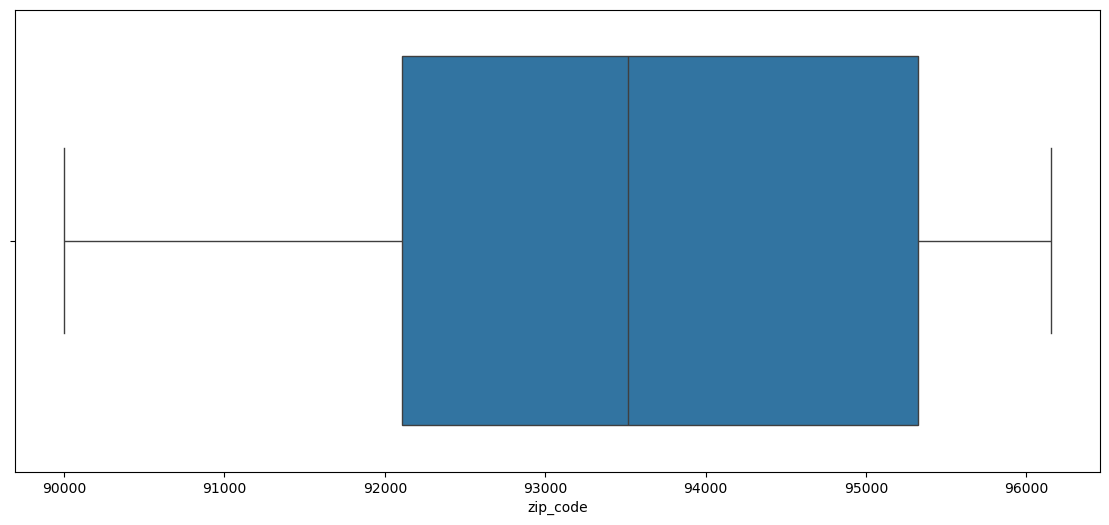

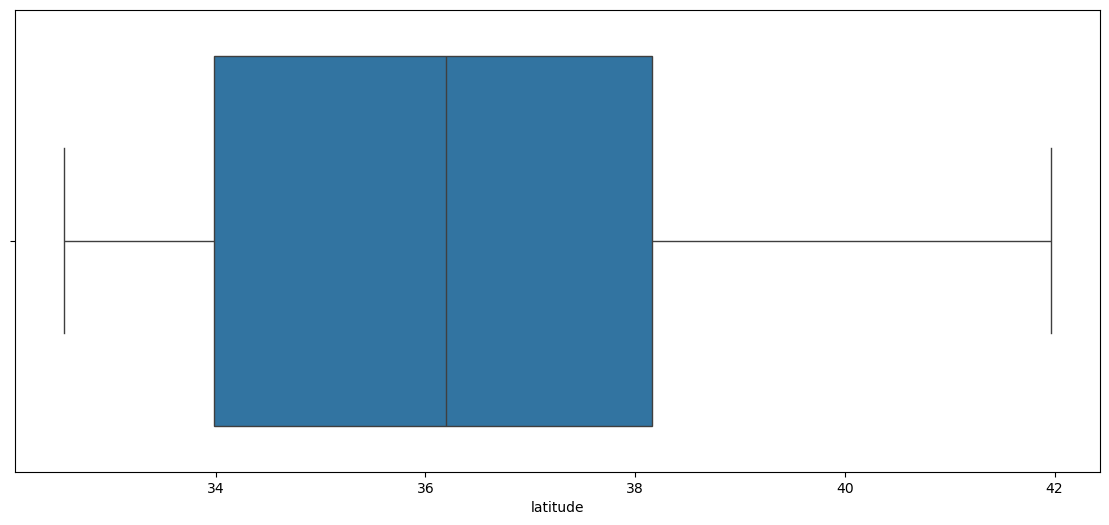

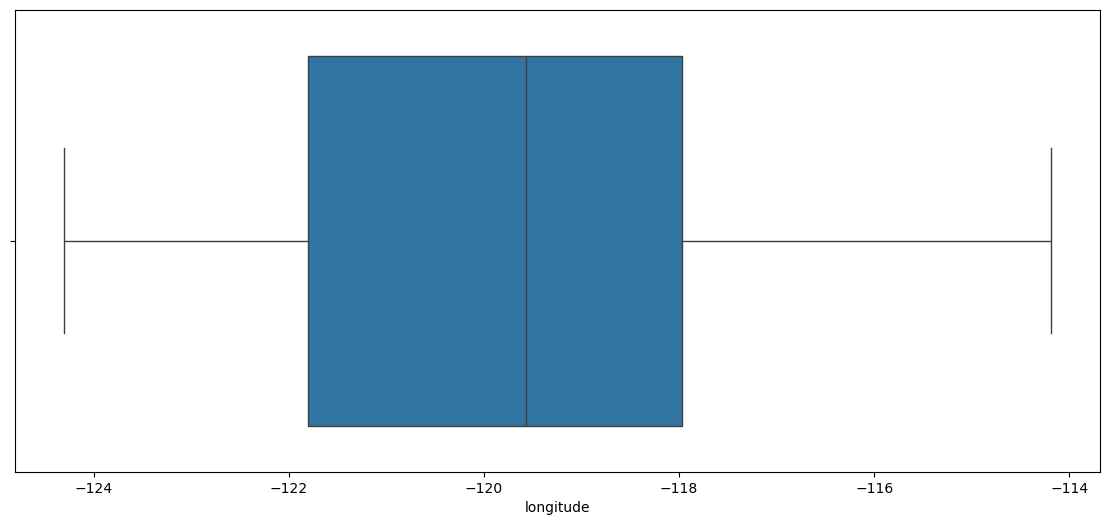

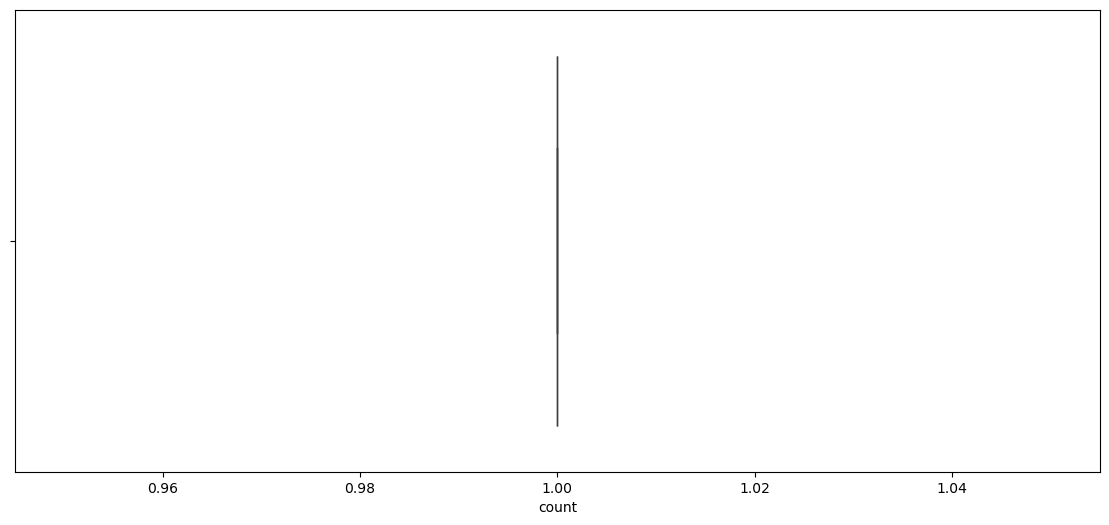

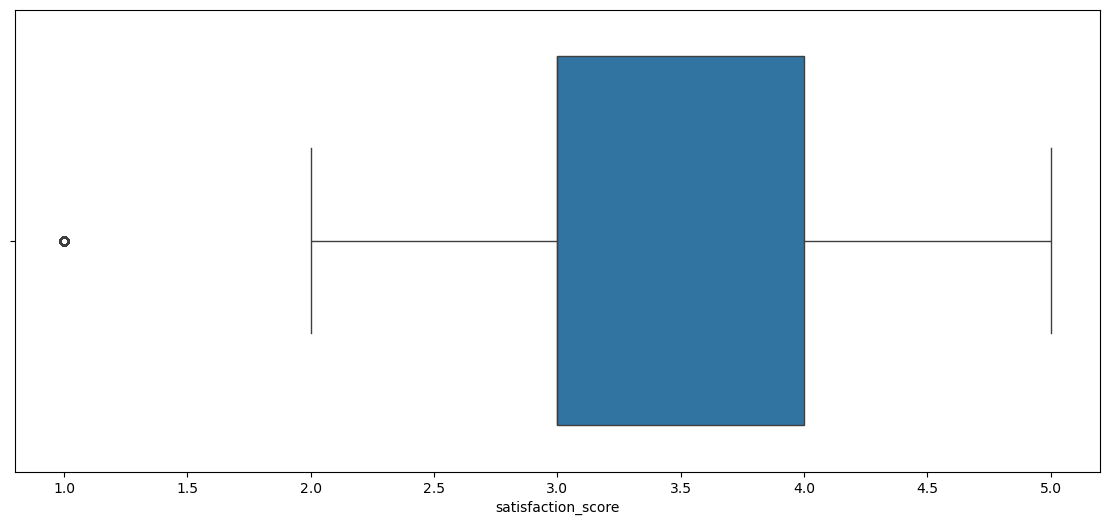

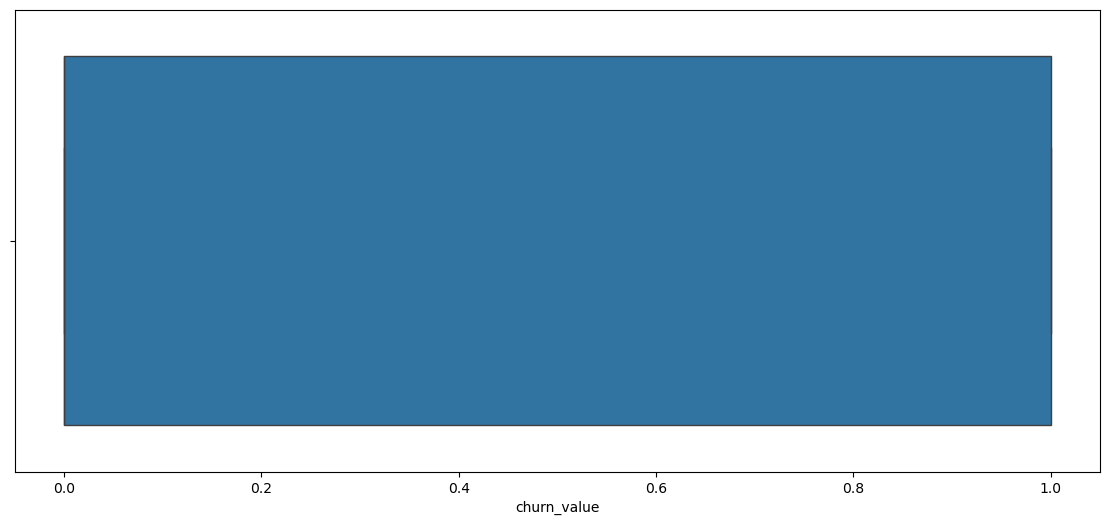

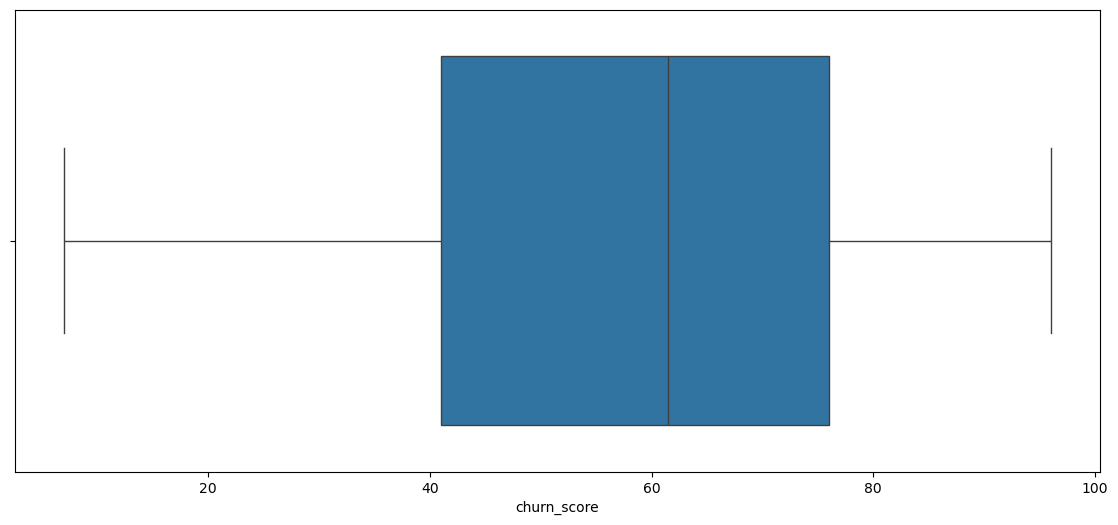

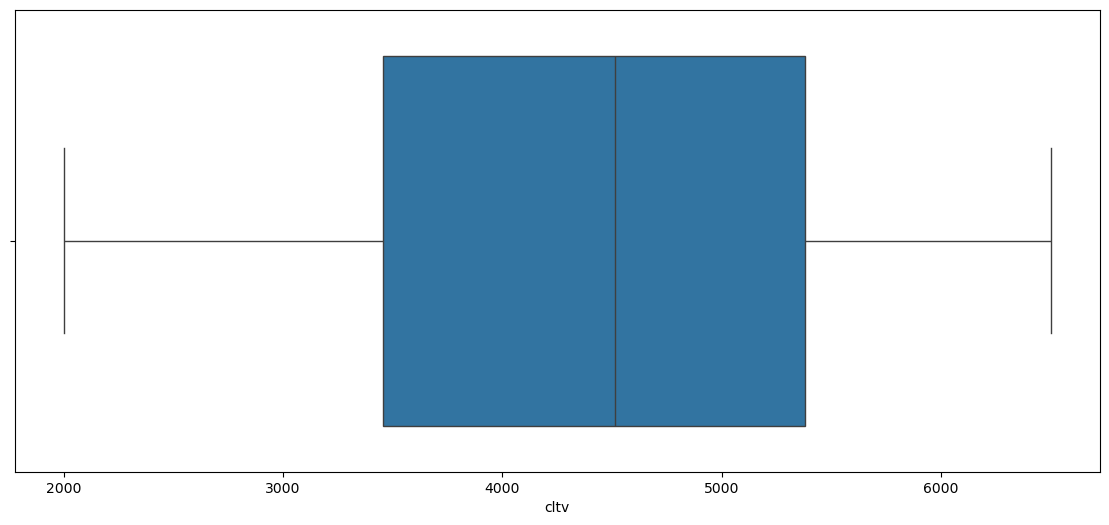

In [236]:
for col in df_numerical_variables.columns:
    if col in bivalue_columns:
        continue
    fig, (ax1) = plt.subplots(1,1, figsize = (14,6))
    sns.boxplot(ax = ax1, data = df_numerical_variables, x = col)
plt.close()
#Using boxplots to better visualize the outliers

In [237]:
for col in ['number_of_dependents', 'total_extra_data_charges', 'total_refunds']: 
    print(df.select(col).unique())
    print()

shape: (9, 1)
┌──────────────────────┐
│ number_of_dependents │
│ ---                  │
│ i64                  │
╞══════════════════════╡
│ 0                    │
│ 6                    │
│ 3                    │
│ 1                    │
│ 4                    │
│ 7                    │
│ 5                    │
│ 2                    │
│ 8                    │
└──────────────────────┘

shape: (16, 1)
┌──────────────────────────┐
│ total_extra_data_charges │
│ ---                      │
│ i64                      │
╞══════════════════════════╡
│ 0                        │
│ 140                      │
│ 30                       │
│ 60                       │
│ 90                       │
│ …                        │
│ 130                      │
│ 20                       │
│ 50                       │
│ 80                       │
│ 110                      │
└──────────────────────────┘

shape: (395, 1)
┌───────────────┐
│ total_refunds │
│ ---           │
│ f64           │
╞════════════

In [238]:

df.select(
    pl.col('number_of_dependents').value_counts(sort=True)
).unnest('number_of_dependents')


number_of_dependents,count
i64,u32
0,4336
1,441
2,424
3,412
5,10
4,6
6,2
7,2
8,1


In [239]:
df.select(
    pl.col('senior_citizen').value_counts(sort=True)
).unnest('senior_citizen')

senior_citizen,count
i64,u32
0,4719
1,915


<a class="anchor" id="1st-bullet">

## 1.1Pre-Processing

</a>

In [240]:
df.columns

['customer_id',
 'referred_a_friend',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'city',
 'zip_code',
 'lat_long',
 'latitude',
 'longitude',
 'count',
 'quarter',
 'satisfaction_score',
 'customer_status',
 'churn_label',
 'churn_value',
 'churn_score',
 'cltv',
 'churn_category',
 'churn_reason',
 'population']

In [241]:
for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: customer_id
shape: (5_634, 1)
┌─────────────┐
│ customer_id │
│ ---         │
│ str         │
╞═════════════╡
│ 2361-FJWNO  │
│ 5124-EOGYE  │
│ 0019-EFAEP  │
│ 9094-AZPHK  │
│ 3768-VHXQO  │
│ …           │
│ 1248-DYXUB  │
│ 5356-RHIPP  │
│ 6198-ZFIOJ  │
│ 7168-HDQHG  │
│ 8591-TKMZH  │
└─────────────┘

Coluna: referred_a_friend
shape: (2, 1)
┌───────────────────┐
│ referred_a_friend │
│ ---               │
│ str               │
╞═══════════════════╡
│ No                │
│ Yes               │
└───────────────────┘

Coluna: offer
shape: (6, 1)
┌─────────┐
│ offer   │
│ ---     │
│ str     │
╞═════════╡
│ Offer A │
│ None    │
│ Offer E │
│ Offer B │
│ Offer D │
│ Offer C │
└─────────┘

Coluna: phone_service
shape: (2, 1)
┌───────────────┐
│ phone_service │
│ ---           │
│ str           │
╞═══════════════╡
│ Yes           │
│ No            │
└───────────────┘

Coluna: multiple_lines
shape: (2, 1)
┌────────────────┐
│ multiple_lines │
│ ---            │
│ str            │
╞════

C:\Users\Danie\AppData\Local\Temp\ipykernel_24940\2074748385.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:


<a class="anchor" id="1st-bullet">

### 1.1.2 Solve Outliers

</a>

In [242]:
q1, q3 = df.select([
    pl.col("number_of_referrals").quantile(0.25).alias("q1"),
    pl.col("number_of_referrals").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("number_of_referrals")
      .clip(upper_bound=upper_bound)
)

In [243]:
q1, q3 = df.select([
    pl.col("avg_monthly_gb_download").quantile(0.25).alias("q1"),
    pl.col("avg_monthly_gb_download").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("avg_monthly_gb_download")
      .clip(upper_bound=upper_bound)
)

In [244]:
q1, q3 = df.select([
    pl.col("total_long_distance_charges").quantile(0.25).alias("q1"),
    pl.col("total_long_distance_charges").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("total_long_distance_charges")
      .clip(upper_bound=upper_bound)
)

In [245]:
q1, q3 = df.select([
    pl.col("total_revenue").quantile(0.25).alias("q1"),
    pl.col("total_revenue").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("total_revenue")
      .clip(upper_bound=upper_bound)
)

In [246]:
q1, q3 = df.select([
    pl.col("satisfaction_score").quantile(0.25).alias("q1"),
    pl.col("satisfaction_score").quantile(0.75).alias("q3")
]).row(0)

lower_bound = q1 - (q3 - q1) * 1.5

df = df.with_columns(
    pl.when(pl.col("satisfaction_score") < lower_bound)
      .then(pl.lit(lower_bound))
      .otherwise(pl.col("satisfaction_score"))
      .alias("satisfaction_score")
)

<a class="anchor" id="1st-bullet">

### 1.1.3 Encoding variables

</a>

In [247]:
valid_vals = ["yes", "no", "male", "female"]

for col in bivalue_columns:
    df = df.with_columns(
        pl.col(col).str.to_lowercase().str.strip_chars()
    )

    mode_val = (
        df
        .filter(pl.col(col).is_in(valid_vals))
        .select(pl.col(col).mode())
        .item()
    )

    df = df.with_columns(
        pl.when(pl.col(col).is_in(valid_vals))
            .then(pl.col(col))
            .otherwise(pl.lit(mode_val))
            .alias(col)
    )

    df = df.with_columns(
        pl.when(pl.col(col).is_in(["yes", "male"]))
            .then(1)
          .when(pl.col(col).is_in(["no", "female"]))
            .then(0)
          .otherwise(None)
          .cast(pl.Int32)
          .alias(col)
    )

In [248]:
df

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,i32,i64,i64,str,i32,f64,i32,i32,str,i64,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,str,f64,f64,f64,i64,f64,f64,i32,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,f64,str,i32,i64,i64,i64,str,str,i64
"""0867-MKZVY""",1,5,20,"""None""",1,36.6,1,1,"""Fiber Optic""",51,1,0,0,0,0,0,1,1,"""Month-to-Month""",0,"""Bank Withdrawal""",82.4,1592.35,33.43,0,732.0,2290.92,0,26,null,0,1,1,"""Altadena""",91001,"""34.196837, -118.142236""",34.196837,-118.142236,1,"""Q3""",1.5,"""Churned""",1,1,86,5719,"""Price""","""Price too high""",36243
"""6624-JDRDS""",0,0,6,"""Offer E""",0,0.0,0,1,"""Cable""",52,1,0,0,0,0,0,0,1,"""Month-to-Month""",0,"""Bank Withdrawal""",29.45,161.45,0.0,0,0.0,161.45,0,22,null,0,0,0,"""Dos Palos""",93620,"""37.045728, -120.630682""",37.045728,-120.630682,1,"""Q3""",3.0,"""Stayed""",0,0,42,4391,"""NO_LABEL""","""NO_LABEL""",9388
"""8496-DMZUK""",0,0,30,"""Offer C""",1,7.19,1,1,"""Fiber Optic""",18,1,1,1,0,0,0,0,1,"""One Year""",0,"""Bank Withdrawal""",90.4,2820.65,0.0,0,215.7,3036.35,1,62,null,0,0,0,"""Soulsbyville""",95372,"""37.990574, -120.261821""",37.990574,-120.261821,1,"""Q3""",4.0,"""Stayed""",0,0,78,3171,"""NO_LABEL""","""NO_LABEL""",1519
"""4393-OBCRR""",0,0,3,"""None""",1,1.47,0,0,"""None""",0,0,0,0,0,0,0,0,0,"""One Year""",0,"""Mailed Check""",20.25,71.2,0.0,0,4.41,75.61,0,60,null,0,0,0,"""Bella Vista""",96008,"""40.722733, -122.109666""",40.722733,-122.109666,1,"""Q3""",3.0,"""Joined""",0,0,31,4331,"""NO_LABEL""","""NO_LABEL""",899
"""1480-IVEVR""",1,2,35,"""None""",1,4.16,1,1,"""Fiber Optic""",28,0,0,1,0,0,0,0,1,"""One Year""",1,"""Bank Withdrawal""",81.6,2815.25,0.0,0,145.6,2960.85,1,76,null,1,1,0,"""Montara""",94037,"""37.540582, -122.509594""",37.540582,-122.509594,1,"""Q3""",3.0,"""Stayed""",0,0,60,2300,"""NO_LABEL""","""NO_LABEL""",2346
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""8441-SHIPE""",0,0,67,"""None""",1,16.72,1,0,"""None""",0,0,0,0,0,0,0,0,0,"""Two Year""",1,"""Bank Withdrawal""",25.6,1790.35,46.06,0,1120.24,2864.53,0,53,null,0,0,0,"""Glendale""",91204,"""34.136306, -118.26036""",34.136306,-118.26036,1,"""Q3""",3.0,"""Stayed""",0,0,34,5183,"""NO_LABEL""","""NO_LABEL""",17015
"""2737-YNGYW""",0,0,2,"""Offer E""",1,33.89,0,1,"""Fiber Optic""",41,0,0,0,0,0,1,1,1,"""Month-to-Month""",0,"""Bank Withdrawal""",80.55,184.1,0.0,0,67.78,251.88,0,29,null,0,0,0,"""Hemet""",92543,"""33.739415, -116.968339""",33.739415,-116.968339,1,"""Q3""",3.0,"""Churned""",1,1,69,2856,"""Attitude""","""Attitude of support person""",29687
"""9351-HXDMR""",1,6,72,"""Offer A""",1,46.16,1,1,"""Fiber Optic""",14,1,0,1,1,1,1,1,1,"""Two Year""",1,"""Credit Card""",110.9,8240.85,0.0,0,2864.39,11000.9,1,37,null,0,1,0,"""Lytle Creek""",92358,"""34.238162, -117.534306""",34.238162,-117.534306,1,"""Q3""",3.0,"""Stayed""",0,0,67,4938,"""NO_LABEL""","""NO_LABEL""",1090


<a class="anchor" id="1st-bullet">

### 1.1.4 Double check for null values and duplicates after these all transformations

</a>

In [249]:
df.null_count()

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5634,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [250]:
df.filter(df.is_duplicated())

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,i32,i64,i64,str,i32,f64,i32,i32,str,i64,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,str,f64,f64,f64,i64,f64,f64,i32,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,f64,str,i32,i64,i64,i64,str,str,i64


In [251]:
for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:
    if col not in bivalue_columns:
        print(f"Coluna: {col}")
        print(df.select(col).unique())
        print()

Coluna: customer_id
shape: (5_634, 1)
┌─────────────┐
│ customer_id │
│ ---         │
│ str         │
╞═════════════╡
│ 8189-XRIKE  │
│ 8552-OBVRU  │
│ 3050-GBUSH  │
│ 9184-GALIL  │
│ 2577-GVSIL  │
│ …           │
│ 5124-EOGYE  │
│ 9907-SWKKF  │
│ 3211-ILJTT  │
│ 7217-JYHOQ  │
│ 8020-BWHYL  │
└─────────────┘

Coluna: offer
shape: (6, 1)
┌─────────┐
│ offer   │
│ ---     │
│ str     │
╞═════════╡
│ None    │
│ Offer B │
│ Offer C │
│ Offer D │
│ Offer E │
│ Offer A │
└─────────┘

Coluna: internet_type
shape: (4, 1)
┌───────────────┐
│ internet_type │
│ ---           │
│ str           │
╞═══════════════╡
│ Fiber Optic   │
│ DSL           │
│ None          │
│ Cable         │
└───────────────┘

Coluna: contract
shape: (3, 1)
┌────────────────┐
│ contract       │
│ ---            │
│ str            │
╞════════════════╡
│ Month-to-Month │
│ One Year       │
│ Two Year       │
└────────────────┘

Coluna: payment_method
shape: (3, 1)
┌─────────────────┐
│ payment_method  │
│ ---             │

C:\Users\Danie\AppData\Local\Temp\ipykernel_24940\182089192.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:


In [252]:
valid_vals = ["Offer A", "Offer B", "Offer C","Offer D", "Offer E"]
col = "offer"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "Offer A")
        .then(1)
        .when(pl.col(col) == "Offer B")
        .then(2)
        .when(pl.col(col) == "Offer C")
        .then(3)
        .when(pl.col(col) == "Offer D")
        .then(4)
        .when(pl.col(col) == "Offer E")
        .then(5)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [253]:
valid_vals = ["DSL", "Cable", "Fiber Optic"]
col = "internet_type"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "DSL")
        .then(1)
        .when(pl.col(col) == "Cable")
        .then(2)
        .when(pl.col(col) == "Fiber Optic")
        .then(3)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [254]:
valid_vals = ["Month-to-Month", "One Year", "Two Year"]
col = "contract"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "Month-to-Month")
        .then(1)
        .when(pl.col(col) == "One Year")
        .then(2)
        .when(pl.col(col) == "Two Year")
        .then(3)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [255]:
valid_vals = ["Churned", "Joined", "Stayed"]
col = "customer_status"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "Churned")
        .then(0)
        .otherwise(1)
        .cast(pl.Int32)
        .alias(col)
)

In [256]:
col = "churn_category"

df = df.with_columns(
    pl.when(pl.col(col) == "NO_LABEL")
        .then(pl.lit("Other"))
        .otherwise(pl.col(col))
        .alias(col)
)

In [257]:
col = "total_extra_data_charges"

df = df.with_columns(
    pl.when(pl.col(col) > 0)
        .then(pl.lit(1))
        .otherwise(pl.col(col))
        .alias(col)
)

In [258]:
col = "total_refunds"

df = df.with_columns(
    pl.when(pl.col(col) > 0)
        .then(pl.lit(1))
        .otherwise(pl.col(col))
        .alias(col)
)

In [259]:
col = "number_of_dependents"

df = df.with_columns(
    pl.when(pl.col(col) > 0)
        .then(pl.lit(1))
        .otherwise(pl.col(col))
        .alias(col)
)

In [260]:
df = df.to_dummies(columns=["payment_method"])

In [261]:
df = df.to_dummies(columns=["churn_category"])

In [262]:
df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))

C:\Users\Danie\AppData\Local\Temp\ipykernel_24940\4039034894.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))


<Axes: >

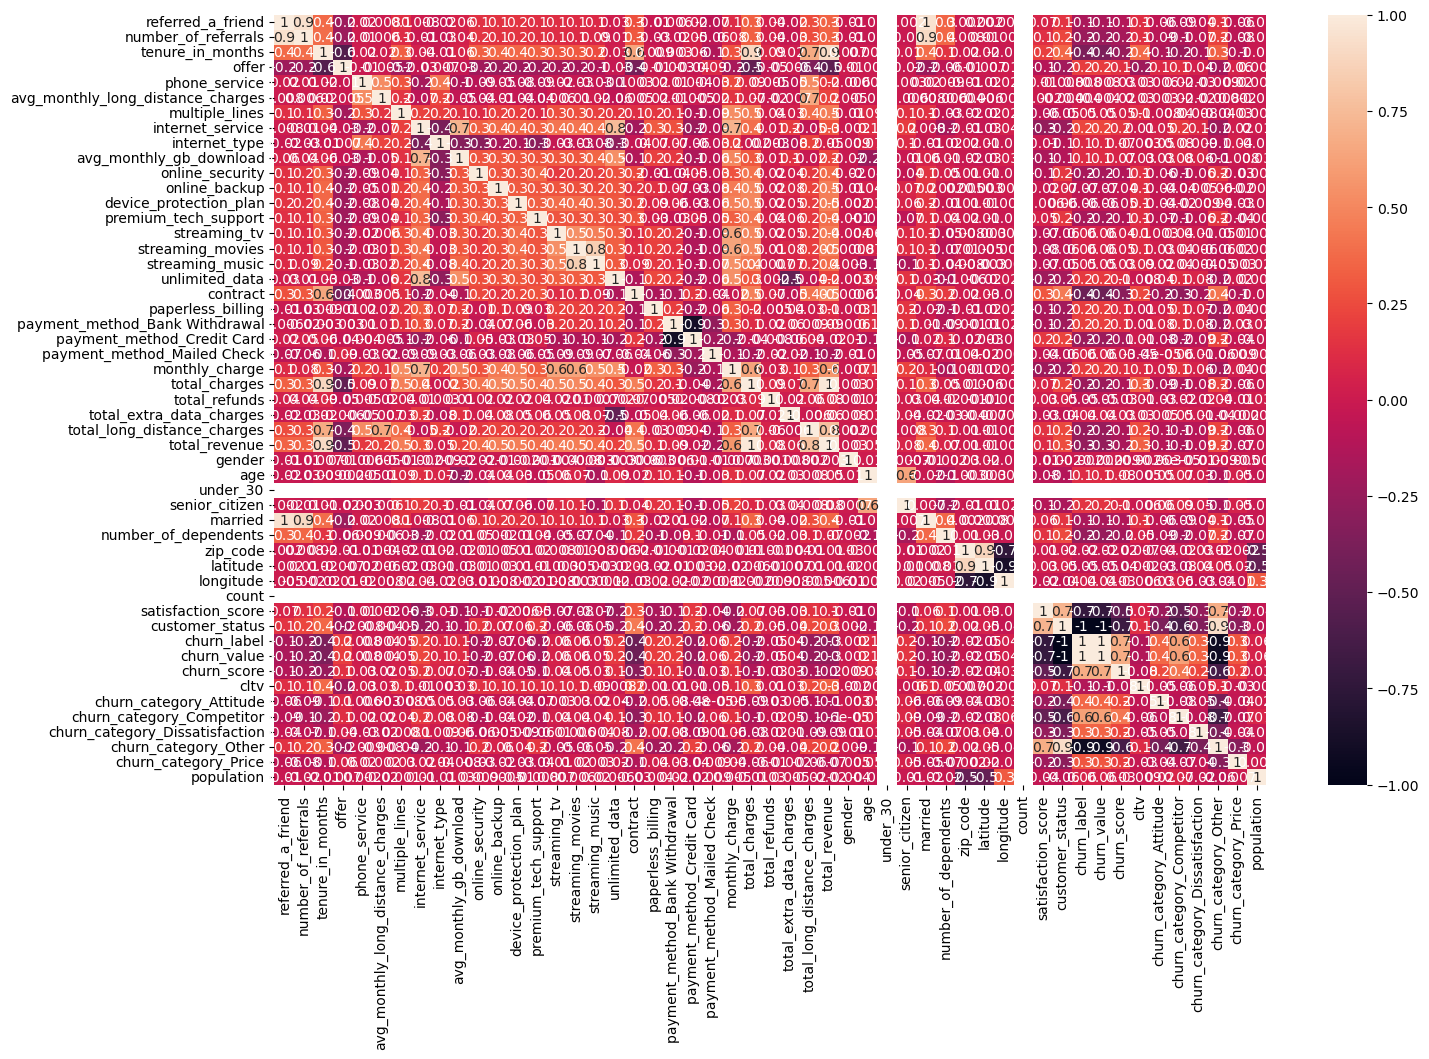

In [263]:
# calculate correlation matrix (convert to pandas for spearman correlation)
from scipy.stats import spearmanr
df_corr = df_numerical_variables.to_pandas().corr(method='spearman')

# plot the correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

In [264]:
df_corr

,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,...,churn_label,churn_value,churn_score,cltv,churn_category_Attitude,churn_category_Competitor,churn_category_Dissatisfaction,churn_category_Other,churn_category_Price,population
referred_a_friend,1.000000,0.944447,0.373752,-0.216307,0.015423,0.007803,0.129043,0.007881,-0.015930,0.055693,...,-0.149866,-0.149866,-0.115255,0.123771,-0.062348,-0.087082,-0.038661,0.139600,-0.060201,-0.013333
number_of_referrals,0.944447,1.000000,0.385958,-0.226433,0.012195,0.005594,0.112272,-0.011250,-0.028473,0.044763,...,-0.233131,-0.233131,-0.175138,0.131795,-0.093905,-0.140124,-0.065329,0.215878,-0.079319,-0.019278
tenure_in_months,0.373752,0.385958,1.000000,-0.564043,0.016044,0.020869,0.333792,0.044337,-0.010929,0.063037,...,-0.362582,-0.362582,-0.237232,0.372791,-0.137450,-0.220989,-0.127273,0.334916,-0.096084,-0.014391
offer,-0.216307,-0.226433,-0.564043,1.000000,-0.013055,-0.005130,-0.185493,-0.033754,0.006949,-0.034379,...,0.192726,0.192726,0.138723,-0.214250,0.098589,0.117343,0.043117,-0.182372,0.059290,0.007414
phone_service,0.015423,0.012195,0.016044,-0.013055,1.000000,0.515985,0.282939,-0.173615,0.436529,-0.134727,...,0.008199,0.008199,0.025427,0.030697,0.005527,0.016222,-0.029494,-0.009288,0.019919,0.001586
avg_monthly_long_distance_charges,0.007803,0.005594,0.020869,-0.005130,0.515985,1.000000,0.151914,-0.073730,0.220612,-0.051528,...,0.003634,0.003634,0.015383,0.025413,0.003485,0.020489,-0.021871,-0.007763,0.001603,-0.015594
multiple_lines,0.129043,0.112272,0.333792,-0.185493,0.282939,0.151914,1.000000,0.210589,0.188885,0.140024,...,0.045844,0.045844,0.048512,0.131721,-0.008086,0.040956,0.008120,-0.043722,0.031574,0.001465
internet_service,0.007881,-0.011250,0.044337,-0.033754,-0.173615,-0.073730,0.210589,1.000000,-0.380874,0.717229,...,0.233805,0.233805,0.157028,0.010049,0.049279,0.172291,0.098906,-0.211167,0.022199,0.013951
internet_type,-0.015930,-0.028473,-0.010929,0.006949,0.436529,0.220612,0.188885,-0.380874,1.000000,-0.321120,...,0.100989,0.100989,0.070460,-0.003312,0.051436,0.075510,0.009411,-0.103345,0.039463,-0.011794
avg_monthly_gb_download,0.055693,0.044763,0.063037,-0.034379,-0.134727,-0.051528,0.140024,0.717229,-0.321120,1.000000,...,0.109487,0.109487,0.069464,0.026109,0.030308,0.083354,0.063611,-0.105144,-0.008232,0.029595


<a class="anchor" id="1st-bullet">

# 2. Feature Engineering

### Droping variables based on correlaction, univalue variable and entire null variable

In [265]:
df = df.drop(['customer_id','under_30', 'count', 'quarter', 'lat_long',	'latitude',	'longitude', 'married', 'total_long_distance_charges', 'tenure_in_months', 'city', 'churn_reason','senior_citizen','referred_a_friend','customer_status','zip_code','churn_label'])
#ATENCAO AQUI o zip code saiu porque está como variavel numerica mas temos de usar alguma coisa para a geografia

In [266]:
df

number_of_referrals,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_revenue,gender,age,number_of_dependents,satisfaction_score,churn_value,churn_score,cltv,churn_category_Attitude,churn_category_Competitor,churn_category_Dissatisfaction,churn_category_Other,churn_category_Price,population
i64,i32,i32,f64,i32,i32,i32,i64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,u8,u8,u8,f64,f64,f64,i64,f64,i32,i64,i64,f64,i64,i64,i64,u8,u8,u8,u8,u8,i64
5,2,1,36.6,1,1,3,51,1,0,0,0,0,0,1,1,1,0,1,0,0,82.4,1592.35,1.0,0,2290.92,0,26,1,1.5,1,86,5719,0,0,0,0,1,36243
0,5,0,0.0,0,1,2,52,1,0,0,0,0,0,0,1,1,0,1,0,0,29.45,161.45,0.0,0,161.45,0,22,0,3.0,0,42,4391,0,0,0,1,0,9388
0,3,1,7.19,1,1,3,18,1,1,1,0,0,0,0,1,2,0,1,0,0,90.4,2820.65,0.0,0,3036.35,1,62,0,4.0,0,78,3171,0,0,0,1,0,1519
0,2,1,1.47,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,1,20.25,71.2,0.0,0,75.61,0,60,0,3.0,0,31,4331,0,0,0,1,0,899
2,2,1,4.16,1,1,3,28,0,0,1,0,0,0,0,1,2,1,1,0,0,81.6,2815.25,0.0,0,2960.85,1,76,0,3.0,0,60,2300,0,0,0,1,0,2346
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,2,1,16.72,1,0,3,0,0,0,0,0,0,0,0,0,3,1,1,0,0,25.6,1790.35,1.0,0,2864.53,0,53,0,3.0,0,34,5183,0,0,0,1,0,17015
0,5,1,33.89,0,1,3,41,0,0,0,0,0,1,1,1,1,0,1,0,0,80.55,184.1,0.0,0,251.88,0,29,0,3.0,1,69,2856,1,0,0,0,0,29687
6,1,1,46.16,1,1,3,14,1,0,1,1,1,1,1,1,3,1,0,1,0,110.9,8240.85,0.0,0,11000.9,1,37,0,3.0,0,67,4938,0,0,0,1,0,1090


In [267]:
df.shape

(5634, 39)

In [268]:
df = df.drop(['churn_category_Other','churn_category_Competitor','churn_category_Dissatisfaction','churn_category_Attitude','churn_category_Price'])

Variance

In [269]:
def apply_variance(X_train, var):
  print(var + ':' + str(X_train.var()))

def select_features_variance(df):
    df_pd = df.to_pandas()
    X = df_pd.drop('churn_value', axis=1)
    y = df_pd['churn_value'].copy()
    numerical_columns = X.select_dtypes(include=[np.number]).columns
    # check which features to use using variance
    for var in numerical_columns:
        apply_variance(X[var], var)

select_features_variance(df)

number_of_referrals:6.502855025229819
offer:1.2626031775200992
phone_service:0.08867820284908141
avg_monthly_long_distance_charges:239.83913162469375
multiple_lines:0.24416392674614595
internet_service:0.1696819184025041
internet_type:0.7148402704006063
avg_monthly_gb_download:351.21260986072406
online_security:0.20451913110786474
online_backup:0.22619473674362145
device_protection_plan:0.22597492551280696
premium_tech_support:0.20705817769306042
streaming_tv:0.23631878325408423
streaming_movies:0.2377752847352691
streaming_music:0.2294728733846482
unlimited_data:0.21996751860535063
contract:0.7201531733891459
paperless_billing:0.24229250635911265
payment_method_Bank Withdrawal:0.24701630516604914
payment_method_Credit Card:0.23835805547977487
payment_method_Mailed Check:0.05026307081204935
monthly_charge:905.2699065836945
total_charges:5141125.122157327
total_refunds:0.06718510103345005
total_extra_data_charges:0.09264665262724374
total_revenue:8221017.56238151
gender:0.25003527503912

Decision Tree

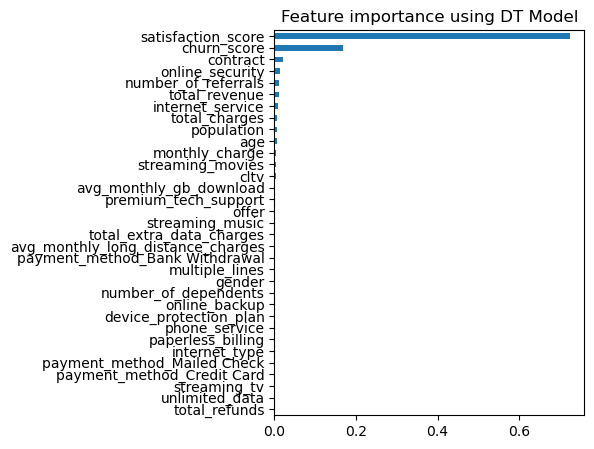

In [270]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier

def plot_importance(variables, name):
    imp_features = variables.sort_values()
    plt.figure(figsize=(4,5))
    imp_features.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

def apply_dt(X_train, y_train):
    dt = DecisionTreeClassifier(random_state = 99).fit(X_train, y_train)
    feature_importances = pd.Series(dt.feature_importances_, index = X_train.columns)
    plot_importance(feature_importances, 'DT')

def select_best_features_dt(df):
    df_pd = df.to_pandas()
    X = df_pd.drop('churn_value', axis = 1)
    y = df_pd['churn_value'].copy()
    apply_dt(X, y)



select_best_features_dt(df)

In [271]:

df_temp = df.drop(['satisfaction_score','churn_score'])

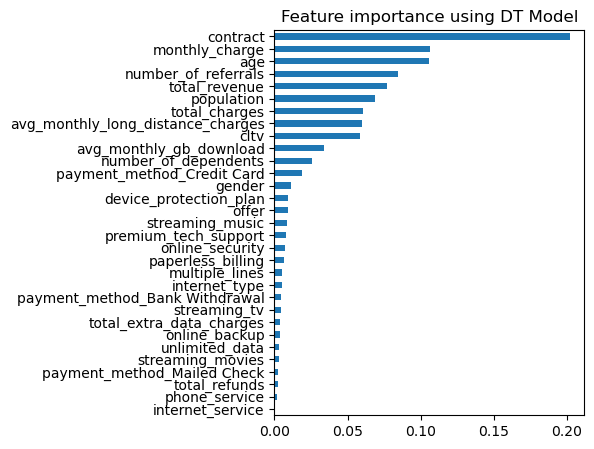

In [272]:
select_best_features_dt(df_temp)

##Title DT
number_of_referrals - YES
offer - YES
phone_service - NO
avg_monthly_long_distance_charges - YES
multiple_lines - NO
internet_service - NO
internet_type - NO
avg_monthly_gb_download - YES
online_security - NO
online_backup - NO
device_protection_plan - NO
premium_tech_support - YES
streaming_tv - NO
streaming_movies - NO
streaming_music - YES
unlimited_data - NO
contract - YES
paperless_billing - NO
payment_method_Bank Withdrawal - NO
payment_method_Credit Card - YES
payment_method_Mailed Check - NO
monthly_charge - YES
total_charges - YES
total_refunds - NO
total_extra_data_charges - NO
total_revenue - YES
gender - NO
age - YES
number_of_dependents - YES
satisfaction_score - NO
churn_value - NO
churn_score - NO
cltv - YES
population - YES

Wrapped Method

In [273]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.feature_selection import RFE 

#def apply_rfe(X_train, y_train):
#    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 5)
#    rfe.fit_transform(X = X_train, y = y_train)
#    selected_features = pd.Series(rfe.support_, index = X_train.columns)
#    print(selected_features)

#def select_best_features(X, y):
#    X_train=X
#    y_train=y
#    numerical_data = X_train.copy()
#    scaler = MinMaxScaler().fit(numerical_data)
#    X_train_scaled = scaler.transform(numerical_data)
#    X_train_scaled = pd.DataFrame(X_train_scaled, columns = numerical_data.columns)


#    print('------------------ RFE ----------------------')
#    apply_rfe(X_train, y_train)
#df_pd = df_temp.to_pandas()
#X = df_pd.drop('churn_value', axis = 1)
#y = df_pd['churn_value'].copy()

#select_best_features(X, y)


In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE 

def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=8)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)


------------------ RFE ----------------------
number_of_referrals            True
contract                       True
payment_method_Mailed Check    True
monthly_charge                 True
total_revenue                  True
age                            True
number_of_dependents           True
population                     True
dtype: bool


In [275]:
def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=10)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    # Escalonar os dados
    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)


------------------ RFE ----------------------
number_of_referrals            True
phone_service                  True
contract                       True
payment_method_Mailed Check    True
monthly_charge                 True
total_charges                  True
total_revenue                  True
age                            True
number_of_dependents           True
population                     True
dtype: bool


In [276]:
def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=15)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    # Escalonar os dados
    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)

------------------ RFE ----------------------
number_of_referrals            True
phone_service                  True
online_security                True
premium_tech_support           True
contract                       True
paperless_billing              True
payment_method_Credit Card     True
payment_method_Mailed Check    True
monthly_charge                 True
total_charges                  True
total_refunds                  True
total_revenue                  True
age                            True
number_of_dependents           True
population                     True
dtype: bool


In [277]:
def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=10)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)


------------------ RFE ----------------------
number_of_referrals            True
phone_service                  True
contract                       True
payment_method_Mailed Check    True
monthly_charge                 True
total_charges                  True
total_revenue                  True
age                            True
number_of_dependents           True
population                     True
dtype: bool


<a class="anchor" id="1st-bullet">

3.1.5 Chisquare

In [278]:
def apply_chisquare(X, y, var, alpha=0.05):
    # Create contingency table
    dfObserved = pd.crosstab(y, X) 
    # Calculate Chi-square
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    
    # Return True if we should keep it (p-value < alpha), else False
    if p < alpha:
        print(f"{var} KEEP (p-value: {p:.4f})")
        return True
    else:
        print(f"{var} DISCARD (p-value: {p:.4f})")
        return False

def select_best_cat_features(df_pd):
    # Separate Features and Target
    X = df_pd.drop('churn_value', axis=1)
    y = df_pd['churn_value'].copy()
    
    selected_features = []
    
    # Iterate over ALL columns in X (since they are already encoded)
    for var in X.columns:
        # Optional: Skip columns that are continuous numbers (like 'TotalCharges' or 'Tenure')
        # if X[var].nunique() > 20: 
        #     continue
            
        if apply_chisquare(X[var], y, var):
            selected_features.append(var)
            
    return selected_features
    
    for var in X_train_cat:
        # If the function returns True, add to our list
        if apply_chisquare(X_train_cat[var], y, var):
            selected_features.append(var)
            
    return selected_features

# Now you can store the best features in a variable
best_features = select_best_cat_features(df_pd)
print("\nFinal Selected Features:", best_features)

number_of_referrals KEEP (p-value: 0.0000)
offer KEEP (p-value: 0.0000)
phone_service DISCARD (p-value: 0.5722)
avg_monthly_long_distance_charges DISCARD (p-value: 0.5675)
multiple_lines KEEP (p-value: 0.0006)
internet_service KEEP (p-value: 0.0000)
internet_type KEEP (p-value: 0.0000)
avg_monthly_gb_download KEEP (p-value: 0.0000)
online_security KEEP (p-value: 0.0000)
online_backup KEEP (p-value: 0.0000)
device_protection_plan KEEP (p-value: 0.0000)
premium_tech_support KEEP (p-value: 0.0000)
streaming_tv KEEP (p-value: 0.0000)
streaming_movies KEEP (p-value: 0.0000)
streaming_music KEEP (p-value: 0.0006)
unlimited_data KEEP (p-value: 0.0000)
contract KEEP (p-value: 0.0000)
paperless_billing KEEP (p-value: 0.0000)
payment_method_Bank Withdrawal KEEP (p-value: 0.0000)
payment_method_Credit Card KEEP (p-value: 0.0000)
payment_method_Mailed Check KEEP (p-value: 0.0000)
monthly_charge KEEP (p-value: 0.0000)
total_charges DISCARD (p-value: 0.5481)
total_refunds KEEP (p-value: 0.0002)
tota

Feature Selection Table
| Feature                          | Decision Tree | RFE-8 | RFE-10 | RFE-15 | Chi-Squared |
|----------------------------------|---------------|-------|--------|--------|-------------|
| number_of_referrals             | YES           | YES   | YES    | YES    | YES         |
| offer                           | YES           | NO    | NO     | NO     | YES         |
| phone_service                   | NO            | NO    | YES    | YES    | NO          |
| avg_monthly_long_distance_charges | YES         | NO    | NO     | NO     | NO          |
| multiple_lines                  | NO            | NO    | NO     | NO     | YES         |
| internet_service                | NO            | NO    | NO     | NO     | YES         |
| internet_type                   | NO            | NO    | NO     | NO     | YES         |
| avg_monthly_gb_download         | YES           | NO    | NO     | NO     | YES         |
| online_security                 | NO            | NO    | NO     | YES    | YES         |
| online_backup                   | NO            | NO    | NO     | YES    | YES         |
| device_protection_plan          | NO            | NO    | NO     | NO     | YES         |
| premium_tech_support            | YES           | NO    | NO     | YES    | YES         |
| streaming_tv                    | NO            | NO    | NO     | NO     | YES         |
| streaming_movies                | NO            | NO    | NO     | NO     | YES         |
| streaming_music                 | YES           | NO    | NO     | NO     | YES         |
| unlimited_data                  | NO            | NO    | NO     | NO     | YES         |
| contract                        | YES           | YES   | YES    | YES    | YES         |
| paperless_billing               | NO            | NO    | NO     | NO     | YES         |
| payment_method_Bank Withdrawal  | NO            | NO    | NO     | NO     | YES         |
| payment_method_Credit Card      | YES           | NO    | NO     | YES    | YES         |
| payment_method_Mailed Check     | NO            | YES   | YES    | YES    | YES         |
| monthly_charge                  | YES           | YES   | YES    | YES    | YES         |
| total_charges                   | YES           | YES   | YES    | YES    | NO          |
| total_refunds                   | NO            | YES   | YES    | YES    | YES         |
| total_extra_data_charges        | NO            | NO    | NO     | NO     | YES         |
| total_revenue                   | YES           | NO    | NO     | YES    | YES         |
| gender                          | NO            | NO    | NO     | NO     | NO          |
| age                             | YES           | YES   | YES    | YES    | YES         |
| number_of_dependents            | YES           | YES   | YES    | YES    | YES         |
| cltv                            | YES           | NO    | NO     | NO     | NO          |
| population                      | YES           | NO    | YES    | YES    | YES         |


In [279]:
df.write_parquet(train_model_path, compression='snappy')